In [1]:

#####################################################################################
# Import Libraries
#####################################################################################
from pymongo import MongoClient
from collections import defaultdict
#import seaborn as sns
#import matplotlib.pyplot as plt
import json
from bson import json_util
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkConf,SparkContext
from pyspark.sql import SQLContext,functions as F

In [2]:
#####################################################################################
# Set Spark session variables
#####################################################################################


g_appname="nest_spark_get_mongodb"
g_master="local[2]"
g_memory="10g"

#Local
#g_input="mongodb://127.0.0.1/backend_production.properties"
g_output="mongodb://127.0.0.1/backend_production.testing"

#Production
g_input="mongodb://3.210.155.32/backend_production.properties"


In [3]:
#####################################################################################
# Set Spark session using mongo-spark-connector
#####################################################################################

my_spark = SparkSession \
     .builder \
     .appName(g_appname) \
     .master(g_master) \
     .config('spark.driver.memory', g_memory)\
     .config("spark.mongodb.input.uri", g_input ) \
     .config("spark.mongodb.output.uri", g_output ) \
     .config("spark.sql.pivotMaxValues", 100000) \
     .config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.11:2.4.0')\
     .getOrCreate()


     #.config("spark.mongodb.output.uri", "mongodb://3.210.155.32/backend_production.properties") \
        

In [116]:
#my_spark.stop()

In [4]:
#####################################################################################
# Set SQL Context (use SQL queries for data analysis)
#####################################################################################

sqlContext=SQLContext(my_spark)


In [7]:
#####################################################################################
# (Read-mode only) Load property data from mongodb properties collection (including US and Canada)
#####################################################################################
df = my_spark.read.format("com.mongodb.spark.sql.DefaultSource")\
    .option("database","backend_production")\
    .option("collection", "properties")\
    .load()

# TESTING Append score to properties collection 

In [ ]:
people = my_spark.createDataFrame([("5d00075ead2e6705ff801f49","Bilbo Baggins",  111), ("Gandalf", 1000), ("Thorin", 195), ("Balin", 178), ("Kili", 77),
   ("Dwalin", 169), ("Oin", 167), ("Gloin", 158), ("Fili", 82), ("Bombur", None)], ["_id","name", "age"])



In [67]:
people1 = my_spark.createDataFrame([("5d00075ead2e6705ff801f49","Bilbo Baggins_YES1",  111)],["_id","name4", "age1"])



In [89]:
people1 = my_spark.createDataFrame([("5d00075ead2e6705ff801f41","45")],["_id","score"])


In [61]:
people1.printSchema()

root
 |-- _id: string (nullable = true)
 |-- name3: string (nullable = true)



In [6]:
people1.write.format("com.mongodb.spark.sql.DefaultSource")\
.mode("append") \
.option("database","backend_production")\
.option("collection", "properties")\
.option("replaceDocument", "false")\
.save()
#Accepted save modes are 'overwrite', 'append', 'ignore', 'error', 'errorifexists'.

NameError: name 'people1' is not defined

In [8]:
pyspark

<module 'pyspark' from '/Users/jatinmalhotra/anaconda3/lib/python3.7/site-packages/pyspark/__init__.py'>

In [ ]:
# # Verify Spark Version
#####################################################################################
import sys
print (sys.version_info)
print(my_spark.version)

# TESTING


In [97]:
df.registerTempTable("df_table")

In [107]:
df2=sqlContext.sql("select CAST (_id as VARCHAR(500)) as _id1, * from df_table")

In [108]:
df2.registerTempTable("df2_table")

In [136]:
df2.printSchema()

root
 |-- _id1: string (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- address_number: string (nullable = true)
 |-- address_street: string (nullable = true)
 |-- agent_avatar_url: null (nullable = true)
 |-- agent_email: string (nullable = true)
 |-- agent_external_id: string (nullable = true)
 |-- agent_fname: string (nullable = true)
 |-- agent_id: string (nullable = true)
 |-- agent_key: string (nullable = true)
 |-- agent_lname: string (nullable = true)
 |-- agent_name: string (nullable = true)
 |-- agent_phone: string (nullable = true)
 |-- architecture_style: string (nullable = true)
 |-- available_showing: null (nullable = true)
 |-- basement: boolean (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- beds: integer (nullable = true)
 |-- brokerage: struct (nullable = true)
 |    |-- address: struct (nullable = true)
 |    |    |-- commons:preference-order: string (nullable = true)
 |    |    |-- commons:address-pref

In [143]:
zz=sqlContext.sql("select _id,status,  CAST (bathrooms as INTEGER) bed from df2_table where _id1='[598115d8e26bff1ac1a0a70a]' ")






In [119]:
zz.registerTempTable("zz")

In [120]:
zz1=sqlContext.sql("select _id, 1 as score from zz")

In [121]:
zz1.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- score: integer (nullable = false)



In [122]:
zz1.write.format("com.mongodb.spark.sql.DefaultSource")\
.mode("append") \
.option("database","backend_production")\
.option("collection", "properties")\
.option("replaceDocument", "false")\
.save()
#Accepted save modes are 'overwrite', 'append', 'ignore', 'error', 'errorifexists'.

In [124]:
zz1.write.format("com.mongodb.spark.sql.DefaultSource")\
.mode("append") \
.option('spark.mongodb.output.uri',g_output)\
.option("replaceDocument", "false")\
.save()
#Accepted save modes are 'overwrite', 'append', 'ignore', 'error', 'errorifexists'.

In [ ]:
people1 = my_spark.createDataFrame([("5d00075ead2e6705ff801f41","45")],["_id","score"])



In [118]:
zz.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- status: struct (nullable = true)
 |    |-- symbol: string (nullable = true)



In [11]:
df2.filter(df2['_id']=='[598115d8e26bff1ac1a0a70a]').show(2,False)

+--------------------------+--------+
|_id                       |status  |
+--------------------------+--------+
|[598115d8e26bff1ac1a0a70a]|[active]|
+--------------------------+--------+



# END


In [6]:
#####################################################################################
# Number of columns (145)
#####################################################################################
len(df.columns)

145

In [19]:
#####################################################################################
# Alternatively, do all above steps by calling a custom function
#####################################################################################

#from nest_db_properties_spark import get_mongo_data_spark
#df=get_mongo_data_spark()

In [8]:
#####################################################################################
# Check schema 
#####################################################################################
df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- address_number: string (nullable = true)
 |-- address_street: string (nullable = true)
 |-- agent_avatar_url: null (nullable = true)
 |-- agent_email: string (nullable = true)
 |-- agent_external_id: string (nullable = true)
 |-- agent_fname: string (nullable = true)
 |-- agent_id: string (nullable = true)
 |-- agent_key: string (nullable = true)
 |-- agent_lname: string (nullable = true)
 |-- agent_name: string (nullable = true)
 |-- agent_phone: string (nullable = true)
 |-- architecture_style: string (nullable = true)
 |-- available_showing: boolean (nullable = true)
 |-- basement: boolean (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- beds: integer (nullable = true)
 |-- brokerage: struct (nullable = true)
 |    |-- address: struct (nullable = true)
 |    |    |-- commons:City: string (nullable = true)
 |    |    |-- commons:Country: string (nullable = true)
 |    |    |-- commons:

In [9]:
#####################################################################################
# Check schema again
#####################################################################################
df.dtypes

[('_id', 'struct<oid:string>'),
 ('address_number', 'string'),
 ('address_street', 'string'),
 ('agent_avatar_url', 'null'),
 ('agent_email', 'string'),
 ('agent_external_id', 'string'),
 ('agent_fname', 'string'),
 ('agent_id', 'string'),
 ('agent_key', 'string'),
 ('agent_lname', 'string'),
 ('agent_name', 'string'),
 ('agent_phone', 'string'),
 ('architecture_style', 'string'),
 ('available_showing', 'boolean'),
 ('basement', 'boolean'),
 ('bathrooms', 'double'),
 ('beds', 'int'),
 ('brokerage',
  'struct<address:struct<commons:City:string,commons:Country:string,commons:FullStreetAddress:string,commons:PostalCode:string,commons:StateOrProvince:string,commons:UnitNumber:string,commons:address-preference-order:string,commons:preference-order:string>,logo_url:string,name:string,phone:string,website_url:string>'),
 ('brokerage_email', 'string'),
 ('brokerage_external_id', 'string'),
 ('brokerage_logo_url', 'string'),
 ('brokerage_name', 'string'),
 ('brokerage_phone', 'string'),
 ('brok

In [10]:
df.schema['year_built'].dataType

IntegerType

In [11]:
df.schema['parking_types'].dataType

ArrayType(StringType,true)

In [12]:
df.schema['water_heater'].dataType

StringType

In [13]:
df.schema['total_sqft'].dataType

StringType

In [14]:
df.schema['stories'].dataType

StringType

In [15]:
df.schema['pool'].dataType

BooleanType

In [294]:
#df.show()

+--------------------+--------------+--------------+----------------+-----------+-----------------+-----------+--------+---------+-----------+-----------+-----------+------------------+-----------------+--------+---------+----+---------+---------------+---------------------+------------------+--------------------+---------------+---------------------+-------------+-------------+------------------+-----------+---------------+-------+--------------------+--------------------+--------------------+----------------+--------------+-----------+-------------+------------+----+----------+------+-------------+-----------+----------+---------+------+--------+----------+---------+-----------------+------------+---------------+--------+-------------------+--------+-----------+-----------------------+------------+-------------+----------+----------+---------------+---------------+---------------+-------------------+-----------------+---------+--------+--------+---------+--------------+---------+----

In [ ]:
#####################################################################################
# TOTAL PROPERTIES (US and Canada) in database (DO NOT RUN THIS UNLESS NEEDED (time consuming))
#####################################################################################
df.count()

In [13]:
#####################################################################################
# Filter ACTIVE CANADA properties 
#####################################################################################
#df_ca=df.filter((df["country"].isin("CA","Canada")) & (df["status"]["symbol"] =='active'))

df_ca=df.filter((df["country"]=='US') & (df["status"]["symbol"] =='active'))



In [140]:
#####################################################################################
# CANADA PROPERTIES in database (DO NOT RUN THIS UNLESS NEEDED (time consuming))
#####################################################################################
df_ca.count()

60609

In [141]:
df_ca.registerTempTable("df_ca_tbl")

# To Pandas for analysis only

In [14]:
df_p=df_ca.toPandas()

Py4JJavaError: An error occurred while calling o113.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Total size of serialized results of 45 tasks (1030.7 MB) is bigger than spark.driver.maxResultSize (1024.0 MB)
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:299)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3257)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3254)
	at org.apache.spark.sql.Dataset$$anonfun$53.apply(Dataset.scala:3364)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3363)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3254)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [ ]:
df_p.shape

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
(df_p.isna().mean().round(4)*100).sort_values(ascending=False)

# END

In [133]:
# drop unecessary features (more than 50% records are null)
ca_drop_features=["has_pond", #100
"has_dock",
"foreclosure",              
"is_wired",                 
"has_barbecue_area",        
"is_new_construction",      
"intercom",                 
"has_basement",             
"heating_systems",          
"heating_fuels",            
"has_wet_bar",              
"has_vaulted_ceiling",      
"has_sprinkler_system",     
"has_sports_court",         
"has_skylight",             
"has_security_system",      
"has_sauna",                
"has_rv_parking",           
"has_porch",                
"has_ceiling_fan",         
"has_patio",                
"has_mother_in_law",        
"has_jetted_bath_tub",      
"has_hot_tub_spa",          
"has_green_house",          
"has_gated_entry",          
"has_garden",               
"has_deck",                
"has_disabled_access",      
"has_elevator",
"cooling_systems",#            100.00
"brokerage_website_url",#      100.00
"lead_routing_email",#         100.00
"architecture_style",#         100.00
"has_double_pane_windows",#    100.00
"agent_phone",#                100.00
"has_doorman",#                100.00
"brokerage_logo_url",#         100.00
"fees",#                       100.00
"external_url",#               100.00
"agent_id",#                   100.00
"num_floors",#                 100.00
"open_houses",#                100.00
"exterior_types",#             100.00
"price_cents_sqft",#           100.00
"brokerage_phone",#            100.00
"agent_email",#                100.00
"rooms",#                      100.00
"tax_amount",#                 100.00
"tags",#                       100.00
"agent_avatar_url",#           100.00
"scoring",#                    100.00
"school",#                     100.00
"brokerage_email",#            100.00
"room_count",#                 100.00
"roof_types",#                 86.29
"unit_number",#                81.94
"building_utilities",#         79.65
"floors",#                     65.05
"partial_bathrooms", #         54.05  
"is_waterfront",
"mls_number",
"address_number",
"address_street",
"location_ids",
"lower_location_id",
"location",
"postal",
"listing_status",
"agent_fname",
"agent_lname",
"external_type",
"agent_key",
"brokerage_external_id",
"brokerage_name",
"building_type",
"external_id",
"geocoded",
"agent_external_id",
"agent_name",
"available_showing",
"basement",
"brokerage",
"cover_public_url",
"created_at",
"description",
"disclose_address",
"fireplaces",
"floors_number",
"full_baths",
"furnished",
"garage",
"half_baths",
"has_attic",
"is_cable_ready",
"listing_category",
"listing_date",
"listing_title",
"listing_url",
"living_area",
"main_level_sqft",
"mls_id",
"mls_name",
"modified_at",
"one_quarter_bathrooms",
"open_house_count",
"parking",
"participant",
"patio",
"pool",
"provider_category",
"provider_name",
"provider_url",
"province",
"roof",
"short_term",
"showing_date",
"state",
"status",
"stories",
"three_quarter_bathrooms",
"type",
"updated_at",
"water",
"water_heater",
"listing_type"# for CA, it hs only one value - by agent                 
                  
    ]

In [143]:
#####################################################################################
# Use relevant features only, drop others (check python notebook to see the logic) 
# filter active properties only
#####################################################################################

df_ca=df_ca.drop(*ca_drop_features)

In [145]:
# Further filter to create a sub-data for faster performance
# this is temporary for analysis only
# Do random sampling
#

df_ca_sub=df_ca.filter(df_ca["city"]=="Toronto")

#df_ca_sub= df_ca.sample(withReplacement=False, fraction=0.50, seed=42)
#seed- random seed for reproducibility


In [146]:
df_ca_sub.registerTempTable("df_ca_sub_tbl")

In [135]:
df_ca_sub_f1.registerTempTable("df_ca_sub_f1_tbl")

In [109]:
df_ca_sub_f1.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- beds: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- has_fireplace: boolean (nullable = true)
 |-- has_garage: boolean (nullable = true)
 |-- has_pool: boolean (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- _id: struct (nullable = true)
 |    |    |    |-- oid: string (nullable = true)
 |    |    |-- created_at: timestamp (nullable = true)
 |    |    |-- modified_at: timestamp (nullable = true)
 |    |    |-- original_url: string (nullable = true)
 |    |    |-- sha1: string (nullable = true)
 |    |    |-- updated_at: timestamp (nullable = true)
 |    |    |-- url: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- parking_types: array (nullable = true)
 |    |-- element: st

In [82]:
df_ca_sub_f1.select('building_type').distinct().show()

+-------------+
|building_type|
+-------------+
|         null|
|     detached|
|    townhouse|
|    apartment|
+-------------+



In [ ]:
#####################################################################################
# Feature Engineering  --
# listing_type 
#####################################################################################

In [27]:
sqlContext.sql("select listing_type, country, count(*) from df_table group by listing_type, country").show(100, False)

# For CA its having only one value - by agent.
# Remove this column

+----------------+-------+--------+
|listing_type    |country|count(1)|
+----------------+-------+--------+
|sold            |US     |321092  |
|by agent        |PR     |1543    |
|null            |null   |6820    |
|by agent        |null   |1798    |
|pending         |US     |145074  |
|pre-foreclosure |US     |1043    |
|by agent        |LA     |1       |
|null            |US     |74676   |
|by agent        |US     |1953040 |
|for rent        |US     |11841   |
|by agent        |CA     |60309   |
|by owner        |US     |15545   |
|new construction|US     |56202   |
|foreclosure     |US     |143     |
|by agent        |MX     |3       |
|by agent        |SB     |2       |
+----------------+-------+--------+



# Feature Engineering  -- utilities 
#####################################################################################

In [61]:
df_ca_f2= df_ca_sub_f1.sample(withReplacement=False, fraction=0.0010, seed=42)
#seed- random seed for reproducibility


In [62]:
df_ca_f2.count()

5

In [87]:
df_ca_f2=df_ca_sub_f1

In [88]:
##converting string type field to array type
df_ca_f2 = df_ca_f2.withColumn("utilities",F.split(F.regexp_replace("utilities", r"([.^\[)|(\]$)|(')", ""), ", "))
##Exploding utilities
df1 = df_ca_f2.withColumn("utilities_array",F.explode_outer("utilities"))
#3Removing "" from new column names
df1 = df1.withColumn("utilities_array",F.regexp_replace("utilities_array","^\"|\"$", ""))
## Finding newly created column name list
utilities_col=df1.select("utilities_array").distinct().collect()
## transforming data to wide format with new cols
df1=df1.groupBy([c for c in df1.columns if c not in {'utilities_array'}]).pivot("utilities_array").count()
## dropping null col which got created where utilties were null
if("null" in df1.columns):
    ## Dropping null columns
    df1=df1.drop("null")
temp=[]
## replacing null with 0 in newly cfreated cols
for col in utilities_col:
    #Dropping null col from the list
    if(col[0]!=None):
        temp.append(col[0])
        df1 = df1.withColumn(col[0], F.when(F.col(col[0]).isNull(),0).otherwise(F.col(col[0])))
##counting total no of utilties
#df1 = df1.withColumn('Total_utilities', sum(df1[col] for col in temp))
#print(df1.show())

Py4JJavaError: An error occurred while calling o2805.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 100.0 failed 1 times, most recent failure: Lost task 0.0 in stage 100.0 (TID 6185, localhost, executor driver): java.util.regex.PatternSyntaxException: Unclosed character class near index 16
([.^\[)|(\]$)|(')
                ^
	at java.util.regex.Pattern.error(Pattern.java:1957)
	at java.util.regex.Pattern.clazz(Pattern.java:2550)
	at java.util.regex.Pattern.sequence(Pattern.java:2065)
	at java.util.regex.Pattern.expr(Pattern.java:1998)
	at java.util.regex.Pattern.group0(Pattern.java:2907)
	at java.util.regex.Pattern.sequence(Pattern.java:2053)
	at java.util.regex.Pattern.expr(Pattern.java:1998)
	at java.util.regex.Pattern.compile(Pattern.java:1698)
	at java.util.regex.Pattern.<init>(Pattern.java:1351)
	at java.util.regex.Pattern.compile(Pattern.java:1028)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$JoinIterator.hasNext(Iterator.scala:212)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.agg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:125)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:403)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:409)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:299)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3257)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3254)
	at org.apache.spark.sql.Dataset$$anonfun$53.apply(Dataset.scala:3364)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3363)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3254)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.util.regex.PatternSyntaxException: Unclosed character class near index 16
([.^\[)|(\]$)|(')
                ^
	at java.util.regex.Pattern.error(Pattern.java:1957)
	at java.util.regex.Pattern.clazz(Pattern.java:2550)
	at java.util.regex.Pattern.sequence(Pattern.java:2065)
	at java.util.regex.Pattern.expr(Pattern.java:1998)
	at java.util.regex.Pattern.group0(Pattern.java:2907)
	at java.util.regex.Pattern.sequence(Pattern.java:2053)
	at java.util.regex.Pattern.expr(Pattern.java:1998)
	at java.util.regex.Pattern.compile(Pattern.java:1698)
	at java.util.regex.Pattern.<init>(Pattern.java:1351)
	at java.util.regex.Pattern.compile(Pattern.java:1028)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$JoinIterator.hasNext(Iterator.scala:212)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.agg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:125)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:403)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:409)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [11]:
df_ca_sub_f1.schema['utilities'].dataType

StringType

In [12]:
#converting string type field to array type
df_ca_sub_f2 = df_ca_sub_f1.withColumn("utilities",F.split(F.regexp_replace("utilities", r"(^\[)|(\]$)|(')", ""), ", "))


In [13]:
df_ca_sub_f2.schema['utilities'].dataType

ArrayType(StringType,true)

In [14]:
##Exploding utilities
df_ca_sub_f3 = df_ca_sub_f2.withColumn("utilities_array",F.explode_outer("utilities"))


In [15]:
df_ca_sub_f3.schema['utilities_array'].dataType

StringType

In [28]:
df_ca_sub_f3.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- beds: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- has_fireplace: boolean (nullable = true)
 |-- has_garage: boolean (nullable = true)
 |-- has_pool: boolean (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- _id: struct (nullable = true)
 |    |    |    |-- oid: string (nullable = true)
 |    |    |-- created_at: timestamp (nullable = true)
 |    |    |-- modified_at: timestamp (nullable = true)
 |    |    |-- original_url: string (nullable = true)
 |    |    |-- sha1: string (nullable = true)
 |    |    |-- updated_at: timestamp (nullable = true)
 |    |    |-- url: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- listing_type: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- price_cents: lon

In [33]:
df_ca_sub_f3.select("utilities").show(100, False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|utilities                                                                                                                                                                                                                                                                                    |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|null                                                                                                                                   

In [34]:
df_ca_sub_f3.select("utilities_array").show(100, False)

+------------------------------------------------------------------------------------------------------------+
|utilities_array                                                                                             |
+------------------------------------------------------------------------------------------------------------+
|null                                                                                                        |
|"2 Fridges"                                                                                                 |
|"2 Stoves"                                                                                                  |
|"Gas Burner & Equipment"                                                                                    |
|"Hot Water Tank (R)"                                                                                        |
|null                                                                                                        |
|

In [35]:
df_ca_sub_f3.count()

39299

In [16]:
#3Removing "" from new column names
df_ca_sub_f4 = df_ca_sub_f3.withColumn("utilities_array",F.regexp_replace("utilities_array","^\"|\"$", ""))


In [37]:
df_ca_sub_f4.select("utilities_array").show(100, False)

+----------------------------------------------------------------------------------------------------------+
|utilities_array                                                                                           |
+----------------------------------------------------------------------------------------------------------+
|null                                                                                                      |
|2 Fridges                                                                                                 |
|2 Stoves                                                                                                  |
|Gas Burner & Equipment                                                                                    |
|Hot Water Tank (R)                                                                                        |
|null                                                                                                      |
|null              

In [34]:
## Finding newly created column name list
utilities_col=df_ca_sub_f4.select("utilities_array").distinct().collect()
#utilities_col=df_ca_sub_f4.select("utilities_array").distinct()


In [18]:
utilities_col.count()

16944

In [19]:
## transforming data to wide format with new cols
df_ca_sub_f5=df_ca_sub_f4.groupBy([c for c in df_ca_sub_f4.columns if c not in {'utilities_array'}]).pivot("utilities_array").count()


In [21]:
df_ca_sub_f5.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- beds: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- has_fireplace: boolean (nullable = true)
 |-- has_garage: boolean (nullable = true)
 |-- has_pool: boolean (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- _id: struct (nullable = true)
 |    |    |    |-- oid: string (nullable = true)
 |    |    |-- created_at: timestamp (nullable = true)
 |    |    |-- modified_at: timestamp (nullable = true)
 |    |    |-- original_url: string (nullable = true)
 |    |    |-- sha1: string (nullable = true)
 |    |    |-- updated_at: timestamp (nullable = true)
 |    |    |-- url: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- listing_type: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- price_cents: int

In [22]:
df_ca_sub_f5.count()

6002

In [25]:
## dropping null col which got created where utilties were null
if("null" in df_ca_sub_f5.columns):
    ## Dropping null columns
    df_ca_sub_f6=df_ca_sub_f5.drop("null")


In [27]:
utilities_col.printSchema()

root
 |-- utilities_array: string (nullable = true)



In [32]:
utilities_col.show(10000, False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|utilities_array                                                                                                                                                                                                                                 |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|S/S Dishwasher. Washer & Dryer. Newer Roof  & Windows. Cac                                                                                                                                                                                      |
|Includes 30\" B/I Appliance

In [40]:
temp=[]
## replacing null with 0 in newly cfreated cols
for col in utilities_col:
    #Dropping null col from the list
    if(col[0]!=None):
        temp.append(col[0])
        df_ca_sub_f5 = df_ca_sub_f5.withColumn(col[0], F.when(F.col(col[0]).isNull(),0).otherwise(F.col(col[0])))


AnalysisException: "Can't extract value from S/S Dishwasher#47382L: need struct type but got bigint;"

In [ ]:
##counting total no of utilties
df1 = df1.withColumn('Total_utilities', sum(df1[col] for col in temp))
print(df1.show())

In [33]:
#####################################################################################
# Feature Engineering -- 
# utilities 
#####################################################################################

sqlContext.sql("select utilities, count(*) from df_ca_table group by utilities ").show(100, False)


+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+
|utilities                                                                                                                                                                                                                                                                                |count(1)|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+
|["Quarts Counters", "Under-Mount Sink In Kitchen & Bathroom", "Designer Cabinet", "Microwave Hood Fan", "Soaker Tub."]  

In [93]:
sqlContext.sql('''
        select (CASE WHEN (NVL(INSTR(upper(utilities),'WASHER'),0)) > 0 THEN 1 ELSE 0 END) as washer, 
             (CASE WHEN (NVL(INSTR(upper(utilities),'DRYER'),0)) > 0 THEN 1 ELSE 0 END) as dryer,
             (CASE WHEN (NVL(INSTR(upper(utilities),'STOVE'),0)) > 0 THEN 1 ELSE 0 END) as stove,
             (CASE WHEN (NVL(INSTR(upper(utilities),'FRIDGE'),0)) > 0 THEN 1 ELSE 0 END) as fridge,
             (CASE WHEN (NVL(INSTR(upper(utilities),'DISHWASHER'),0)) > 0 THEN 1 ELSE 0 END) as dishwasher,
             (CASE WHEN (NVL(INSTR(upper(utilities),'MICROWAVE'),0)) > 0 THEN 1 ELSE 0 END) as microwave,
             (CASE WHEN (NVL(INSTR(upper(utilities),'GYM'),0)) > 0 THEN 1 ELSE 0 END) as gym
              from df_ca_table
        ''').show(100,False)


+------+-----+-----+------+----------+---------+---+
|washer|dryer|stove|fridge|dishwasher|microwave|gym|
+------+-----+-----+------+----------+---------+---+
|0     |0    |0    |0     |0         |0        |0  |
|0     |0    |1    |1     |0         |0        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|0     |0    |0    |0     |0         |1        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|1     |1    |1    |1     |1         |1        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|0     |0    |0    |0     |0         |0        |0  |
|1     |1    |1    |1     |1         |1        |0  |
|0     |0    |0    |0     |0         |0       

# End of utilities 
#####################################################################################

# Feature Engineering -- Parking Types 


In [97]:
df_ca_sub_f1.count()

6002

In [100]:
df_ca_sub_f1.select("_id","parking_types").show(1000, False)

+--------------------------+-----------------+
|_id                       |parking_types    |
+--------------------------+-----------------+
|[5b7eec721f6d950001b5edce]|null             |
|[5ce70187650b160001590fe4]|null             |
|[5bbf21aee0c5ed00017f8bd6]|null             |
|[5bbe6f617c1e9000015bc5a8]|[Underground]    |
|[5bd45c3121611f00011dd30b]|null             |
|[5c76fa60c5c1f10001f8f791]|[Underground]    |
|[5c77981192596f000114b5ac]|null             |
|[5c76ac5b92596f00011411d5]|null             |
|[5bc520fbe746e30001fc5612]|[Underground]    |
|[5c883058b5d50800019ed96b]|null             |
|[5bd7a60173316300011840ff]|[Underground]    |
|[5c861a3ab5d50800019e4189]|null             |
|[5bdce8bb73316300011c13bc]|[Underground]    |
|[5c7f9a9c64ad710001208ded]|null             |
|[5c76e70a92596f0001141e2b]|null             |
|[5c93a33dbe7c7e00011f32b2]|[Underground]    |
|[5c76e6d492596f0001141dfe]|null             |
|[5bf7638bbc09e7000197bf35]|null             |
|[5c7ce091c5c

In [95]:
df_property_type = df_ca_sub_f1.select("_id","parking_types").withColumn("parking_types_array",F.explode("parking_types"))




In [99]:
df_property_type.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- parking_types: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- parking_types_array: string (nullable = true)



In [96]:
df_property_type.count()

312

In [98]:
df_property_type.show(213,False)

+--------------------------+-----------------+-------------------+
|_id                       |parking_types    |parking_types_array|
+--------------------------+-----------------+-------------------+
|[5bbe6f617c1e9000015bc5a8]|[Underground]    |Underground        |
|[5c76fa60c5c1f10001f8f791]|[Underground]    |Underground        |
|[5bc520fbe746e30001fc5612]|[Underground]    |Underground        |
|[5bd7a60173316300011840ff]|[Underground]    |Underground        |
|[5bdce8bb73316300011c13bc]|[Underground]    |Underground        |
|[5c93a33dbe7c7e00011f32b2]|[Underground]    |Underground        |
|[5c7ce091c5c1f10001fc4457]|[Garage]         |Garage             |
|[5c0c0e97bc09e700019fb262]|[Underground]    |Underground        |
|[5c1e414abc09e70001a50fb0]|[Underground]    |Underground        |
|[5c294317bc09e70001a6c84c]|[Garage]         |Garage             |
|[5c2f165ebc09e70001a73c77]|[Detached garage]|Detached garage    |
|[5c2f486dbc09e70001a7c2fb]|[Detached garage]|Detached garage 

In [102]:
df_ca_sub_f1_1 = df_ca_sub_f1.join(df_property_type, '_id', 'left') \
              .drop("parking_types")

In [103]:
df_ca_sub_f1_1.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- beds: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- has_fireplace: boolean (nullable = true)
 |-- has_garage: boolean (nullable = true)
 |-- has_pool: boolean (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- _id: struct (nullable = true)
 |    |    |    |-- oid: string (nullable = true)
 |    |    |-- created_at: timestamp (nullable = true)
 |    |    |-- modified_at: timestamp (nullable = true)
 |    |    |-- original_url: string (nullable = true)
 |    |    |-- sha1: string (nullable = true)
 |    |    |-- updated_at: timestamp (nullable = true)
 |    |    |-- url: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- listing_type: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- price_cents: int

In [105]:
df_ca_sub_f1_1.select("parking_types_array").distinct().show()

+-------------------+
|parking_types_array|
+-------------------+
|    Detached garage|
|               null|
|        Underground|
|             Garage|
|    Attached garage|
|            Carport|
|    Visitor parking|
+-------------------+



In [118]:
sqlContext.sql("select parking_types, count(1) from df_ca_sub_f1_tbl group by 1").show()

+-----------------+--------+
|    parking_types|count(1)|
+-----------------+--------+
|[Detached garage]|      32|
|             null|    5690|
|    [Underground]|     161|
|         [Garage]|      57|
|[Attached garage]|      56|
|        [Carport]|       3|
|[Visitor parking]|       3|
+-----------------+--------+



In [ ]:
# replace null with "NonKnown" category and do one hot encoding

# End of utilities 
#####################################################################################

# Feature Engineering -- property_type

In [112]:
df_ca_sub_f1.select("_id","property_type","property_sub_type").show(1000, False)

+--------------------------+-------------+--------------------------+
|_id                       |property_type|property_sub_type         |
+--------------------------+-------------+--------------------------+
|[5b7eec721f6d950001b5edce]|Single Family|House                     |
|[5ce70187650b160001590fe4]|null         |null                      |
|[5bbf21aee0c5ed00017f8bd6]|Single Family|House                     |
|[5bbe6f617c1e9000015bc5a8]|Single Family|Row / Townhouse           |
|[5bd45c3121611f00011dd30b]|Residential  |Single Family Detached    |
|[5c76fa60c5c1f10001f8f791]|Single Family|Apartment                 |
|[5c77981192596f000114b5ac]|null         |null                      |
|[5c76ac5b92596f00011411d5]|null         |null                      |
|[5bc520fbe746e30001fc5612]|Single Family|Apartment                 |
|[5c883058b5d50800019ed96b]|null         |null                      |
|[5bd7a60173316300011840ff]|Single Family|Apartment                 |
|[5c861a3ab5d5080001

In [119]:
sqlContext.sql("select property_type, count(1) from df_ca_sub_f1_tbl group by 1").show(1000, False)

+-------------+--------+
|property_type|count(1)|
+-------------+--------+
|      Parking|       2|
|  Residential|      36|
|         null|    5606|
|  MultiFamily|       2|
|Single Family|     355|
|       Retail|       1|
+-------------+--------+



In [123]:
df.registerTempTable("df_table")

In [125]:
sqlContext.sql("select property_sub_type, count(1) from df_table group by 1").show(1000, False)

+--------------------------+--------+
|property_sub_type         |count(1)|
+--------------------------+--------+
|Apartment                 |162     |
|Townhouse                 |6       |
|Parking                   |2       |
|null                      |5607    |
|Row / Townhouse           |27      |
|Other                     |4       |
|Single Family Detached    |18      |
|Fourplex                  |1       |
|House                     |164     |
|Residential Commercial Mix|1       |
|Triplex                   |2       |
|Single Family Attached    |4       |
|Duplex                    |4       |
+--------------------------+--------+



In [124]:
sqlContext.sql("select property_sub_type, count(1) from df_ca_sub_f1_tbl group by 1").show(1000, False)

+--------------------------+--------+
|property_sub_type         |count(1)|
+--------------------------+--------+
|Apartment                 |162     |
|Townhouse                 |6       |
|Parking                   |2       |
|null                      |5607    |
|Row / Townhouse           |27      |
|Other                     |4       |
|Single Family Detached    |18      |
|Fourplex                  |1       |
|House                     |164     |
|Residential Commercial Mix|1       |
|Triplex                   |2       |
|Single Family Attached    |4       |
|Duplex                    |4       |
+--------------------------+--------+



# End Property Type

# Feature Engineering -- SQFT

In [ ]:
##total_sqft || lot_sqft || building_sqf

In [128]:
df_ca_sub_f1

In [204]:
df_sqft= sqlContext.sql('''
select beds, CAST (NVL(total_sqft, NVL(lot_sqft,building_sqft)) as INTEGER) as sqft from df_ca_tbl
''')

In [205]:
df_sqft.printSchema()

root
 |-- beds: integer (nullable = true)
 |-- sqft: integer (nullable = true)



In [206]:
df_sqft.registerTempTable("df_sqft_tbl")

In [207]:
sqlContext.sql('''
select count(*) from df_sqft_tbl where (sqft is null or sqft=0)
''').show()

+--------+
|count(1)|
+--------+
|   39715|
+--------+



In [209]:
df_sqft_1=sqlContext.sql('''
select beds, sqft from df_sqft_tbl where sqft is not null and sqft > 15
''')

In [ ]:
# Still more than 50% null


In [188]:
sqlContext.sql('''
select count(1) from df_sqft_tbl where  sqft=0
''').show()

+--------+
|count(1)|
+--------+
|     284|
+--------+



In [189]:
sqlContext.sql('''
select beds, max(sqft) from df_sqft_tbl where sqft is not null and sqft!=0) group by 1
''').show()

+----+---------+
|beds|max(sqft)|
+----+---------+
|  12|     4655|
|   1|  1097388|
|  13|     5500|
|   6|  1970503|
|   3|  8811000|
|  20|      972|
|   5|  2849939|
|   9|   366090|
|   4|  7840800|
|   8|   533320|
|   7|  4385756|
|  10|     8573|
|   2|  9058977|
|   0|  7316352|
+----+---------+



In [198]:
sqlContext.sql('''
select beds, min(sqft) from df_sqft_tbl where sqft is not null and sqft >15 group by 1
''').show()

+----+---------+
|beds|min(sqft)|
+----+---------+
|  12|     4000|
|   1|       35|
|  13|     5500|
|   6|      100|
|   3|       16|
|  20|      972|
|   5|       24|
|   9|     2569|
|   4|       27|
|   8|      146|
|   7|       60|
|  10|     4220|
|   2|       17|
|   0|       34|
+----+---------+



In [190]:
sqlContext.sql('''
select beds, avg(sqft) from df_sqft_tbl where (sqft is not null or sqft!=0) group by 1
''').show()

+----+------------------+
|beds|         avg(sqft)|
+----+------------------+
|  12|            4327.5|
|   1| 7044.320334261838|
|  13|            5500.0|
|   6|36499.355987055016|
|   3| 23327.34346987405|
|  20|             972.0|
|   5| 28694.90527654164|
|   9|19863.157894736843|
|   4|20063.191052993807|
|   8|21987.926829268294|
|   7| 76857.98684210527|
|  10|            6396.5|
|   2| 25184.10563973064|
|   0| 76102.12732919255|
+----+------------------+



In [231]:
df_sqft_bed1=sqlContext.sql('''
select beds, sqft from df_sqft_tbl where sqft is not null and sqft > 15 and beds=2
''')

In [216]:
df_sqft_bed1.show()

+----+----+
|beds|sqft|
+----+----+
|   1|1798|
|   1| 630|
|   1|1177|
|   1| 590|
|   1|2028|
|   1|2391|
|   1|2646|
|   1|1985|
|   1|2354|
|   1|2302|
|   1|2313|
|   1|2386|
|   1|2762|
|   1|2424|
|   1|2351|
|   1| 800|
|   1| 987|
|   1| 186|
|   1| 768|
|   1| 815|
+----+----+
only showing top 20 rows



In [232]:
#####################################################################################
## Filter/Remove outlier records ()
#####################################################################################

std_val = df_sqft_bed1.agg({'sqft':'stddev'}).collect()[0][0]
mean_val= df_sqft_bed1.agg({'sqft':'mean'}).collect()[0][0]

hi_bound  =  mean_val + (1 * std_val)
low_bound =  mean_val - (1 * std_val)

#images_outliers = df_ca_sub_f.where((df_ca_sub_f['images_count']<hi_bound) & (df_ca_sub_f['images_count']>low_bound))
df_sqft_outliers=df_sqft_bed1.where((df_sqft_1['sqft']>hi_bound) | (df_sqft_bed1['sqft']<low_bound))

df_sqft_without_outliers = df_sqft_bed1.where((df_sqft_1['sqft']<hi_bound) & (df_sqft_bed1['sqft']>low_bound))


In [233]:
mean_val

25397.88327674024

In [229]:
std_val

59403.71936784437

In [230]:
df_sqft_outliers.show(10000, False)

+----+-------+
|beds|sqft   |
+----+-------+
|1   |1097388|
|1   |147680 |
|1   |90090  |
|1   |137052 |
+----+-------+



In [226]:
df_sqft_without_outliers.show(10000, False)

+----+-----+
|beds|sqft |
+----+-----+
|1   |1798 |
|1   |630  |
|1   |1177 |
|1   |590  |
|1   |2028 |
|1   |2391 |
|1   |2646 |
|1   |1985 |
|1   |2354 |
|1   |2302 |
|1   |2313 |
|1   |2386 |
|1   |2762 |
|1   |2424 |
|1   |2351 |
|1   |800  |
|1   |987  |
|1   |186  |
|1   |768  |
|1   |815  |
|1   |721  |
|1   |60   |
|1   |668  |
|1   |834  |
|1   |2870 |
|1   |2870 |
|1   |990  |
|1   |795  |
|1   |589  |
|1   |71   |
|1   |450  |
|1   |86   |
|1   |600  |
|1   |2120 |
|1   |500  |
|1   |1615 |
|1   |59   |
|1   |1168 |
|1   |573  |
|1   |527  |
|1   |731  |
|1   |1060 |
|1   |52   |
|1   |370  |
|1   |590  |
|1   |623  |
|1   |768  |
|1   |945  |
|1   |480  |
|1   |220  |
|1   |600  |
|1   |485  |
|1   |554  |
|1   |888  |
|1   |710  |
|1   |426  |
|1   |689  |
|1   |400  |
|1   |576  |
|1   |672  |
|1   |588  |
|1   |768  |
|1   |643  |
|1   |623  |
|1   |530  |
|1   |618  |
|1   |554  |
|1   |643  |
|1   |510  |
|1   |161  |
|1   |505  |
|1   |706  |
|1   |88   |
|1   |840  |

In [214]:
sqlContext.sql('''
select beds, round(avg(sqft)) from df_sqft_tbl where sqft is not null and sqft >15 group by 1
''').show()

+----+-----------------------------------+
|beds|round(avg(CAST(sqft AS BIGINT)), 0)|
+----+-----------------------------------+
|  12|                             4328.0|
|   1|                             7084.0|
|  13|                             5500.0|
|   6|                            36978.0|
|   3|                            23468.0|
|  20|                              972.0|
|   5|                            28971.0|
|   9|                            20400.0|
|   4|                            20183.0|
|   8|                            23724.0|
|   7|                            80016.0|
|  10|                             6397.0|
|   2|                            25398.0|
|   0|                           288292.0|
+----+-----------------------------------+



# END OF SQFT

# Feature Engineering -- Price 

In [363]:
sqlContext.sql("select bathrooms,beds, utilities, city, year_built from df_ca_tbl where price_cents is null").show(30, False)


+---------+----+---------+-----------+----------+
|bathrooms|beds|utilities|city       |year_built|
+---------+----+---------+-----------+----------+
|3.0      |3   |null     |Pickering  |null      |
|2.0      |4   |null     |Scugog     |null      |
|3.0      |4   |null     |Clarington |null      |
|2.0      |3   |null     |Oshawa     |null      |
|3.0      |3   |null     |Whitby     |null      |
|3.0      |3   |null     |Oshawa     |null      |
|4.0      |4   |null     |Oshawa     |null      |
|4.0      |4   |null     |Oshawa     |null      |
|1.0      |2   |null     |Whitby     |null      |
|0.0      |2   |null     |Ajax       |null      |
|3.0      |4   |null     |Oshawa     |null      |
|3.0      |3   |null     |Whitby     |null      |
|3.0      |4   |null     |Whitby     |null      |
|4.0      |4   |null     |Whitby     |null      |
|3.0      |3   |null     |Clarington |2014      |
|2.0      |4   |null     |Oshawa     |null      |
|2.0      |2   |null     |Grafton    |null      |


In [234]:
df_ca.describe(['price_cents']).show()

+-------+--------------------+
|summary|         price_cents|
+-------+--------------------+
|  count|               60582|
|   mean| 8.178069747377108E7|
| stddev|1.0466037354253785E8|
|    min|         -2144967296|
|    max|          2100000000|
+-------+--------------------+



In [257]:
df_price= sqlContext.sql('''
select beds, price_cents from df_ca_tbl
''')

In [258]:
df_price.registerTempTable("df_price_tbl")

In [237]:
sqlContext.sql('''
select count(*) from df_price where price_cents  is null or price_cents  < 1000
''').show()

+--------+
|count(1)|
+--------+
|      48|
+--------+



In [256]:
sqlContext.sql('''
select beds, min(price_cents) from df_price_tbl where price_cents is not null and price_cents > 1000 group by 1
''').show()

+----+----------------+
|beds|min(price_cents)|
+----+----------------+
|  12|         1.399E7|
|   1|        115000.0|
|  13|         3.299E7|
|   6|       3500000.0|
|  16|         3.299E7|
|   3|        165000.0|
|  20|           3.4E8|
|   5|        240000.0|
|   9|         1.599E7|
|   4|        240000.0|
|   8|       6000000.0|
|   7|       6949800.0|
|  10|         1.699E7|
|1623|         3.499E7|
|  11|          3.89E7|
|  14|         4.999E7|
|   2|        159500.0|
|   0|          1200.0|
+----+----------------+



In [276]:
sqlContext.sql('''
select beds, CAST( round(mean(price_cents)) as INTEGER) mean, CAST( round(stddev(price_cents)) as INTEGER) std from df_price_tbl where price_cents is not null and price_cents > 1000 group by 1
''').show()


+----+---------+---------+
|beds|     mean|      std|
+----+---------+---------+
|  12|152925000|134018343|
|   1| 46270263| 43548037|
|  13|103995000| 76325269|
|   6|178052910|206350625|
|  16| 32990000|        0|
|   3| 66672349| 69029543|
|  20|340000000|        0|
|   5|136678741|155773859|
|   9|196312300|191506092|
|   4|101704250| 99278265|
|   8|223945769|236771865|
|   7|216256535|254955754|
|  10|165849133|217780711|
|1623| 34990000|        0|
|  11|204629138|130140054|
|  14|199993850|212137479|
|   2| 54200654| 65572072|
|   0| 49309870|113330444|
+----+---------+---------+



In [279]:
aa=sqlContext.sql('''
select beds, CAST( round(mean(price_cents)) as INTEGER) mean, CAST( round(stddev(price_cents)) as INTEGER) std from df_price_tbl where price_cents is not null and price_cents > 1000 group by 1
''').collect()



In [280]:
print(aa)

[Row(beds=12, mean=152925000, std=134018343), Row(beds=1, mean=46270263, std=43548037), Row(beds=13, mean=103995000, std=76325269), Row(beds=6, mean=178052910, std=206350625), Row(beds=16, mean=32990000, std=0), Row(beds=3, mean=66672349, std=69029543), Row(beds=20, mean=340000000, std=0), Row(beds=5, mean=136678741, std=155773859), Row(beds=9, mean=196312300, std=191506092), Row(beds=4, mean=101704250, std=99278265), Row(beds=8, mean=223945769, std=236771865), Row(beds=7, mean=216256535, std=254955754), Row(beds=10, mean=165849133, std=217780711), Row(beds=1623, mean=34990000, std=0), Row(beds=11, mean=204629138, std=130140054), Row(beds=14, mean=199993850, std=212137479), Row(beds=2, mean=54200654, std=65572072), Row(beds=0, mean=49309870, std=113330444)]


In [281]:
for i in aa:
    print (i[0], i[1], i[2])

12 152925000 134018343
1 46270263 43548037
13 103995000 76325269
6 178052910 206350625
16 32990000 0
3 66672349 69029543
20 340000000 0
5 136678741 155773859
9 196312300 191506092
4 101704250 99278265
8 223945769 236771865
7 216256535 254955754
10 165849133 217780711
1623 34990000 0
11 204629138 130140054
14 199993850 212137479
2 54200654 65572072
0 49309870 113330444


In [340]:
hi_bound  =  32990000 + (3 * i[2])
low_bound =  32990000 - (3 * i[2])
data = df_price.where((df_price['price_cents']<=hi_bound) & (df_price['price_cents']>low_bound) 
                                              & (df_price['beds']==16)
                                             )
mean_val= data.agg({'price_cents':'mean'}).collect()[0][0]
print(i[0],i[1],mean_val)
   
#sqlContext.sql("select nvl(price_cents,{0}) from df_price_tbl where beds={1} ".format(mean_val,i[0]))
    
    
    

16 32990000 None


In [347]:
data = df_price.where( (df_price['beds']==16))


In [352]:
data.agg({'price_cents':'mean'}).show()


+----------------+
|avg(price_cents)|
+----------------+
|       1.52925E8|
+----------------+



In [349]:
data.show()

+----+-----------+
|beds|price_cents|
+----+-----------+
|  16|   32990000|
+----+-----------+



In [ ]:
for i in aa:
    hi_bound  =  i[1] + (3 * i[2])
    low_bound =  i[1] - (3 * i[2])
    data = df_price.where((df_price['price_cents']<=hi_bound) & (df_price['price_cents']>=low_bound) 
                                              & (df_price['beds']==i[0])
                                             )
    #std_val = data.agg({'price_cents':'stddev'}).collect()[0][0]
    mean_val= data.agg({'price_cents':'mean'}).collect()[0][0]
    print(i[0],i[1],mean_val)
   
    df_price_new=sqlContext.sql("select nvl(price_cents,{0}) as price_cents_new, * from df_price_tbl where price_cents is null and beds={1} ".format(mean_val,i[0]))
    
    mean_val=0
    
    

12 152925000 152925000.0
1 46270263 42852162.97181478
13 103995000 103995000.0
6 178052910 153761970.86435986
16 32990000 32990000.0
3 66672349 61099654.17112404
20 340000000 340000000.0
5 136678741 122561897.5901254
9 196312300 184351862.3853211


In [ ]:
sqlContext.sql('''
select count(*) from df_price where price_cents is null and beds=1
''').show()


In [331]:
sqlContext.sql('''
select * from df_price where price_cents is not null and beds=6 and price_cents=153761970.86435986
''').show()

+----+-----------+
|beds|price_cents|
+----+-----------+
+----+-----------+



In [ ]:
#####################################################################################
## Filter/Remove outlier records ()
#####################################################################################

std_val = df_sqft_bed1.agg({'sqft':'stddev'}).collect()[0][0]
mean_val= df_sqft_bed1.agg({'sqft':'mean'}).collect()[0][0]

hi_bound  =  mean_val + (1 * std_val)
low_bound =  mean_val - (1 * std_val)

#images_outliers = df_ca_sub_f.where((df_ca_sub_f['images_count']<hi_bound) & (df_ca_sub_f['images_count']>low_bound))
df_sqft_outliers=df_sqft_bed1.where((df_sqft_1['sqft']>hi_bound) | (df_sqft_bed1['sqft']<low_bound))

df_sqft_without_outliers = df_sqft_bed1.where((df_sqft_1['sqft']<hi_bound) & (df_sqft_bed1['sqft']>low_bound))

In [11]:
#####################################################################################
# Feature Engineering -- 
# Images 
#####################################################################################

tmp_images = df_ca_sub_f1 \
                .withColumn("images", F.explode("images")) \
                .groupBy("_id").count()

In [87]:
tmp_images.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- count: long (nullable = false)



In [12]:
df_ca_sub_f=df_ca_sub_f1.join(tmp_images, '_id','left') \
            .withColumnRenamed("count", "images_count") \
            .drop("images")

In [89]:
df_ca_sub_f[df_ca_sub_f.images_count == None].count()

0

In [16]:

from pyspark.sql.functions import col
df_ca_sub_f.where(col("images_count").isNull()).count()

0

In [135]:
df_ca_sub_f.schema['images_count'].dataType

LongType

In [27]:
df_ca_sub_f.select('images_count').distinct().show()

+------------+
|images_count|
+------------+
|          29|
|          26|
|          65|
|          19|
|          54|
|         112|
|          22|
|           7|
|          34|
|          50|
|          94|
|          57|
|          43|
|          32|
|          84|
|          31|
|          39|
|          98|
|          25|
|          95|
+------------+
only showing top 20 rows



In [13]:
#####################################################################################
## Replace  missing values
#####################################################################################

df_ca_sub_f.fillna(0,subset=['images_count'])

##mean_val= df_ca_sub_f.agg({'images_count':'mean'}).collect()[0][0]
##df_ca_sub_f.fillna(mean_val,subset=['images_count'])



DataFrame[_id: struct<oid:string>, bathrooms: double, beds: int, city: string, country: string, has_fireplace: boolean, has_garage: boolean, has_pool: boolean, latitude: double, longitude: double, price_cents: bigint, year_built: int, images_count: bigint]

In [32]:
#####################################################################################
## Filter/Remove outlier records ()
#####################################################################################

std_val = df_ca_sub_f.agg({'images_count':'stddev'}).collect()[0][0]
mean_val= df_ca_sub_f.agg({'images_count':'mean'}).collect()[0][0]

hi_bound  =  mean_val + (3 * std_val)
low_bound =  mean_val - (3 * std_val)

#images_outliers = df_ca_sub_f.where((df_ca_sub_f['images_count']<hi_bound) & (df_ca_sub_f['images_count']>low_bound))
images_outliers=df_ca_sub_f.where((df_ca_sub_f['images_count']>hi_bound) | (df_ca_sub_f['images_count']<low_bound))

images_without_outliers = df_ca_sub_f.where((df_ca_sub_f['images_count']<hi_bound) & (df_ca_sub_f['images_count']>low_bound))


In [34]:
images_outliers.select("_id","images_count").show()

13154

In [ ]:
images_outliers.count()

In [ ]:
print(hi_bound,low_bound)

In [ ]:
print(mean_val,std_val)

In [ ]:
images_mean=images_without_outliers.agg({'images_count':'mean'}).collect()[0][0]

In [ ]:
#There are lot of outliers in IMAGES COUNT
# user bucketing to bucket image count
# 0-5
# 5-10
# 10-15
#

In [ ]:
print(images_mean)

In [ ]:
#####################################################################################
# END 'Images' 
#####################################################################################


In [17]:
df_ca_sub_f.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- beds: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- has_fireplace: boolean (nullable = true)
 |-- has_garage: boolean (nullable = true)
 |-- has_pool: boolean (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- price_cents: integer (nullable = true)
 |-- year_built: integer (nullable = true)
 |-- images_count: long (nullable = false)



In [ ]:
#####################################################################################
# Feature Engineer has_garage, has_fireplace and has_pool
# use SQL to convert into numberic and NULLS can be replaced with 0 which means false
# No other feature enigneering is required for boolean fields
#####################################################################################


In [94]:
#df_ca_sub_f[df_ca_sub_f.has_garage == 'null'].count()


0

In [95]:
#from pyspark.sql.functions import col
#df_ca_sub_f.where(df_ca_sub_f["has_garage"].isNull()).count()


389

In [15]:
#df_ca_sub_f.where(col("has_garage").isNull()).count()

7

In [18]:
#####################################################################################
## Replace  missing values - Note, fillna does not work with boolean fields
#####################################################################################

#df_ca_sub_f.fillna(False,subset=['has_garage','has_fireplace','has_pool'])

##mean_val= df_ca_sub_f.agg({'images_count':'mean'}).collect()[0][0]
##df_ca_sub_f.fillna(mean_val,subset=['images_count'])



DataFrame[_id: struct<oid:string>, bathrooms: double, beds: int, city: string, country: string, has_fireplace: boolean, has_garage: boolean, has_pool: boolean, latitude: double, longitude: double, price_cents: int, year_built: int, images_count: bigint]

In [93]:
df_ca_sub_f.select('has_garage','has_fireplace','has_pool').show(2,truncate=10)

+----------+-------------+--------+
|has_garage|has_fireplace|has_pool|
+----------+-------------+--------+
|      null|         null|    null|
|     false|         true|   false|
+----------+-------------+--------+
only showing top 2 rows



In [109]:
#df_ca_sub_f = df_ca_sub_f.withColumn('has_garage', F.col('has_garage').cast('integer'))

In [ ]:
#####################################################################################
## Feature Engineer Year_Built column
#####################################################################################


In [ ]:
#df_pandas=df_ca_sub_f.toPandas()
#df_pandas_year=df_pandas['year_built']

#year_built_mode= (df_ca_sub_f.agg({'year_built': 'mean'}).collect()[0][0]).cast('double')

In [14]:
df_ca_sub_f.registerTempTable("df_ca_sub_table")

In [15]:
mean_values=sqlContext.sql('''
                select floor(mean(year_built)), 
                       ceil(mean(beds)),
                       ceil(mean(bathrooms)),
                       round(mean(price_cents))
                from df_ca_sub_table
               ''').collect()

In [20]:
print(mean_values[0][1])
            

3


In [91]:
df1=sqlContext.sql('''
                 select CAST (_id as VARCHAR(500)) as _id,
                        CAST (latitude as DOUBLE) as latitude,
                        CAST (longitude * -1 as DOUBLE) as longitude,
                        images_count, 
                        nvl(year_built, {0}) as year_built, 
                        nvl(beds,{1}) as beds ,
                        nvl(bathrooms,{2}) as bathrooms,
                        nvl(price_cents,{3}) as price_cents,
                        nvl(city, 'NONE') as city,
                        (CASE has_garage
                           WHEN TRUE THEN 1
                           ELSE 0
                        END) as has_garage,
                        (CASE has_fireplace
                           WHEN TRUE THEN 1
                           ELSE 0
                        END) as has_fireplace,
                        (CASE has_pool
                           WHEN TRUE THEN 1
                           ELSE 0
                        END) as has_pool
                from df_ca_sub_table
                '''\
               .format(\
                       mean_values[0][0],\
                       mean_values[0][1],\
                       mean_values[0][2],\
                       mean_values[0][3]),\
              )

In [92]:
df1.printSchema()

root
 |-- _id: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- images_count: long (nullable = false)
 |-- year_built: integer (nullable = false)
 |-- beds: integer (nullable = false)
 |-- bathrooms: double (nullable = false)
 |-- price_cents: decimal(21,1) (nullable = false)
 |-- city: string (nullable = false)
 |-- has_garage: integer (nullable = false)
 |-- has_fireplace: integer (nullable = false)
 |-- has_pool: integer (nullable = false)



In [85]:
df1.select("latitude","longitude").show(truncate=1000)

+----------------+----------------+
|        latitude|       longitude|
+----------------+----------------+
|      43.7021577|      79.4191308|
|43.6397370460906|79.5636537792634|
|      43.7786037|      79.3076356|
|      43.6413112|      79.4164556|
|      43.7299355|   79.3273039375|
|43.7122249020296|79.4415139028301|
|      43.6251242|      79.4786293|
|       43.650438|       79.392333|
|     43.77978377|     79.41853152|
|      43.7323763|      79.3060042|
|43.7032816205567|79.2937703285965|
|      43.6928161|      79.2811599|
|      43.7206935|      79.3911023|
|       43.653963|       79.387207|
|43.7002752246272|79.2577343412867|
|43.7709502534751|79.4390963190245|
|      43.6454276|      79.3642531|
|      43.6442891|      79.3634915|
|      43.6420615|      79.4118555|
|      43.7837183|      79.3921212|
+----------------+----------------+
only showing top 20 rows



In [ ]:
#####################################################################################
## Replace  missing values
#####################################################################################

#df_ca_sub_f.fillna(1900,subset=['year_built'])

#df_ca_sub_f.na.fill(1)


#df_ca_sub_f.withColumn(df_ca_sub_f['year_built']).na.fill(1)


#df_ca_sub_f.fillna( { 'year_built':0 } )

#df_ca_sub_f.fillna( { 'year_built':0 } )


#mode_val= df_ca_sub_f.agg({'year_built':'mean'})
#df_ca_sub_f.fillna(mode_val,subset=['year_built'])


In [33]:
##String Indexer
# Convert Strings to Numbers

from __future__ import print_function
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer

stringIndexer = [StringIndexer(handleInvalid='keep', inputCol=column, outputCol=column+"_index") for column in list(set(df1.columns)-set(['_id','latitude','longitude','beds', 'bathrooms', 'price_cents', 'year_built', 'images_count','has_pool','has_fireplace','has_garage'])) ]


pipeline = Pipeline(stages= stringIndexer)

df_r = pipeline.fit(df1).transform(df1)



"\nstringIndexer = StringIndexer(inputCol='city', outputCol='city_index')\n\nmodel=stringIndexer.fit(df_ca_sub_f)\nindexed=model.transform(df_ca_sub_f)\n"

In [34]:
df_r.printSchema()

root
 |-- _id: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- images_count: long (nullable = false)
 |-- year_built: integer (nullable = false)
 |-- beds: integer (nullable = false)
 |-- bathrooms: double (nullable = false)
 |-- price_cents: decimal(21,1) (nullable = false)
 |-- city: string (nullable = false)
 |-- has_garage: integer (nullable = false)
 |-- has_fireplace: integer (nullable = false)
 |-- has_pool: integer (nullable = false)
 |-- city_index: double (nullable = false)



In [35]:
df_r.select("city","city_index").show(truncate=1000)

+-------+----------+
|   city|city_index|
+-------+----------+
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
|Toronto|       0.0|
+-------+----------+
only showing top 20 rows



In [79]:
from __future__ import print_function

from pyspark.ml.linalg import Vectors

from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder 
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import MinMaxScaler

from pyspark.ml import Pipeline



In [96]:
features = ["latitude", "longitude", "images_count", "year_built","beds","bathrooms","price_cents","city_index","has_garage","has_fireplace","has_pool"]


In [110]:
stringIndexer1 = StringIndexer(handleInvalid='keep', inputCol='city', outputCol="city_index") 
#stringIndexer2 = StringIndexer(handleInvalid='keep', inputCol='_id', outputCol="_id_index") 


vectorAssembler = VectorAssembler(inputCols=features, outputCol="unscaled_features")
#standardScaler = StandardScaler(inputCol="unscaled_features", outputCol="scaled_features")
standardScaler = MinMaxScaler(inputCol="unscaled_features", outputCol="scaled_features")


In [111]:
stages = [stringIndexer1,stringIndexer2, vectorAssembler, standardScaler]
pipeline = Pipeline(stages=stages)

In [112]:
model = pipeline.fit(df1)
prediction = model.transform(df1)

In [113]:
prediction.printSchema()

root
 |-- _id: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- images_count: long (nullable = false)
 |-- year_built: integer (nullable = false)
 |-- beds: integer (nullable = false)
 |-- bathrooms: double (nullable = false)
 |-- price_cents: decimal(21,1) (nullable = false)
 |-- city: string (nullable = false)
 |-- has_garage: integer (nullable = false)
 |-- has_fireplace: integer (nullable = false)
 |-- has_pool: integer (nullable = false)
 |-- city_index: double (nullable = false)
 |-- _id_index: double (nullable = false)
 |-- unscaled_features: vector (nullable = true)
 |-- scaled_features: vector (nullable = true)



In [98]:
prediction.select("unscaled_features").show(2,truncate=1000)

+------------------------------------------------------------------------------+
|                                                             unscaled_features|
+------------------------------------------------------------------------------+
|            [43.7021577,79.4191308,20.0,2018.0,2.0,2.0,5.99E7,0.0,1.0,0.0,0.0]|
|[43.6397370460906,79.5636537792634,19.0,2018.0,3.0,2.0,7.41E7,0.0,0.0,0.0,0.0]|
+------------------------------------------------------------------------------+
only showing top 2 rows



In [65]:
prediction.select("scaled_features").show(2,truncate=1000)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                    scaled_features|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[200.11552121818934,314.02645123773004,2.2581692074609703,4525.832275108238,1.439946485535149,1.1828602286101342,0.47280972321695264,0.0,3.026895324023314,0.0,0.0]|
|               [199.82969227176505,314.5979009355954,2.1452607470879217,4525.832275108238,2.1599197283027234,1.1828602286101342,0.5848948328944272,0.0,0.0,0.0,0.0]|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
only

In [99]:
from pyspark.ml.feature import BucketedRandomProjectionLSH
from pyspark.sql.functions import col

brp = BucketedRandomProjectionLSH(inputCol="scaled_features", outputCol="hashes", bucketLength=2.0,
                                      numHashTables=3)
model = brp.fit(prediction)


# Feature Transformation
print("The hashed dataset where hashed values are stored in the column 'hashes':")
df_model=model.transform(prediction)


# Compute the locality sensitive hashes for the input rows, then perform approximate
# similarity join.
# We could avoid computing hashes by passing in the already-transformed dataset, e.g.
# `model.approxSimilarityJoin(transformedA, transformedB, 1.5)`
print("Approximately joining dfA and dfB on Euclidean distance smaller than 1.5:")
df_final=model.approxSimilarityJoin(prediction, prediction, 1.5, distCol="EuclideanDistance")
        

The hashed dataset where hashed values are stored in the column 'hashes':
Approximately joining dfA and dfB on Euclidean distance smaller than 1.5:


In [100]:
aa1=df_final.select("datasetA._id","datasetB._id","EuclideanDistance").filter(df_final['datasetA']['_id']=='[5c8d9824be7c7e00011ec1a2]')




In [101]:
aa1.registerTempTable("aa_table1")


In [116]:


#sqlContext.sql("select * from aa_table1 order by 3 asc").show(truncate=10000)


sqlContext.sql("select * from aa_table1 order by 3 asc").show(2, truncate=False)



+--------------------------+--------------------------+-------------------+
|_id                       |_id                       |EuclideanDistance  |
+--------------------------+--------------------------+-------------------+
|[5c8d9824be7c7e00011ec1a2]|[5c8d9824be7c7e00011ec1a2]|0.0                |
|[5c8d9824be7c7e00011ec1a2]|[5c7b6ce6c5c1f10001fbea2c]|0.02564779319667389|
+--------------------------+--------------------------+-------------------+
only showing top 2 rows



In [ ]:
from pyspark.sql import functions as F

new_df = df.select(
    "age",
    F.struct(
        F.col("number"),
        F.col("name"),
    ).alias("values")
).groupBy(
    "age"
).agg(
    F.collect_list("values").alias("values")
)

new_df.toJSON()
# or
new_df.write.json(...)


In [ ]:
#################################################################
##COVERT EACH FEATURE INTO A VECTOR to be passed to MinMax Scaler
#################################################################


In [41]:
#
# VectorAssembler just converts your features into one single vector without any data transofrmation.
# data values remain same, just that the columns from String, Int and booleans, etc are converted to vectore containing
# original values

##
  
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


a1  = VectorAssembler(inputCols=["latitude"],outputCol="latitude_v").transform(df_r)
a2  = VectorAssembler(inputCols=["longitude"],outputCol="longitude_v").transform(a1)
a3  = VectorAssembler(inputCols=["images_count"],outputCol="images_count_v").transform(a2)
a4  = VectorAssembler(inputCols=["year_built"],outputCol="year_built_v").transform(a3)
a5  = VectorAssembler(inputCols=["beds"],outputCol="beds_v").transform(a4)
a6  = VectorAssembler(inputCols=["bathrooms"],outputCol="bathrooms_v").transform(a5)
a7  = VectorAssembler(inputCols=["price_cents"],outputCol="price_cents_v").transform(a6)
a8  = VectorAssembler(inputCols=["city_index"],outputCol="city_index_v").transform(a7)
a9  = VectorAssembler(inputCols=["has_garage"],outputCol="has_garage_v").transform(a8)
a10 = VectorAssembler(inputCols=["has_fireplace"],outputCol="has_fireplace_v").transform(a9)
a11 = VectorAssembler(inputCols=["has_pool"],outputCol="has_pool_v").transform(a10)



In [25]:
a11.printSchema()

root
 |-- _id: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- images_count: long (nullable = false)
 |-- year_built: integer (nullable = false)
 |-- beds: integer (nullable = false)
 |-- bathrooms: double (nullable = false)
 |-- price_cents: decimal(11,1) (nullable = false)
 |-- city: string (nullable = false)
 |-- has_garage: integer (nullable = false)
 |-- has_fireplace: integer (nullable = false)
 |-- has_pool: integer (nullable = false)
 |-- city_index: double (nullable = false)
 |-- latitude_v: vector (nullable = true)
 |-- longitude_v: vector (nullable = true)
 |-- images_count_v: vector (nullable = true)
 |-- year_built_v: vector (nullable = true)
 |-- beds_v: vector (nullable = true)
 |-- bathrooms_v: vector (nullable = true)
 |-- price_cents_v: vector (nullable = true)
 |-- city_index_v: vector (nullable = true)
 |-- has_garage_v: vector (nullable = true)
 |-- has_fireplace_v: vector (nullable = true)
 |-- has_poo

In [26]:
a11.select("bathrooms_v","beds_v").show(truncate=100)

+-----------+------+
|bathrooms_v|beds_v|
+-----------+------+
|      [2.0]| [2.0]|
|      [2.0]| [3.0]|
|      [1.0]| [4.0]|
|      [1.0]| [1.0]|
|      [2.0]| [2.0]|
|      [2.0]| [3.0]|
|      [2.0]| [2.0]|
|      [1.0]| [1.0]|
|      [2.0]| [2.0]|
|      [3.0]| [2.0]|
|      [3.0]| [3.0]|
|      [3.0]| [4.0]|
|      [4.0]| [6.0]|
|      [2.0]| [3.0]|
|      [2.0]| [4.0]|
|      [4.0]| [3.0]|
|      [4.0]| [3.0]|
|      [1.0]| [1.0]|
|      [1.0]| [1.0]|
|      [3.0]| [2.0]|
+-----------+------+
only showing top 20 rows



In [33]:
from pyspark.ml.feature import StandardScaler

## USE StandardScaler or MinMaxScaler, not both

stncl1 = StandardScaler(inputCol="latitude_v", outputCol="latitude_v_s",withStd=True, withMean=False).fit(a11).transform(a11)
stncl2 = StandardScaler(inputCol="longitude_v", outputCol="longitude_v_s",withStd=True, withMean=False).fit(stncl1).transform(stncl1)
stncl3 = StandardScaler(inputCol="images_count_v", outputCol="images_count_v_s",withStd=True, withMean=False).fit(stncl2).transform(stncl2)
stncl4 = StandardScaler(inputCol="year_built_v", outputCol="year_built_v_s",withStd=True, withMean=False).fit(stncl3).transform(stncl3)
stncl5 = StandardScaler(inputCol="beds_v", outputCol="beds_v_s",withStd=True, withMean=False).fit(stncl4).transform(stncl4)
stncl6 = StandardScaler(inputCol="bathrooms_v", outputCol="bathrooms_v_s",withStd=True, withMean=False).fit(stncl5).transform(stncl5)
stncl7 = StandardScaler(inputCol="price_cents_v", outputCol="price_cents_v_s",withStd=True, withMean=False).fit(stncl6).transform(stncl6)
stncl8 = StandardScaler(inputCol="city_index_v", outputCol="city_index_v_s",withStd=True, withMean=False).fit(stncl7).transform(stncl7)
stncl9 = StandardScaler(inputCol="has_garage_v", outputCol="has_garage_v_s",withStd=True, withMean=False).fit(stncl8).transform(stncl8)
stncl10 = StandardScaler(inputCol="has_fireplace_v", outputCol="has_fireplace_v_s",withStd=True, withMean=False).fit(stncl9).transform(stncl9)
stncl11 = StandardScaler(inputCol="has_pool_v", outputCol="has_pool_v_S",withStd=True, withMean=False).fit(stncl10).transform(stncl10)


In [40]:
stncl11.select(           'latitude_v_s',
                          'images_count_v_s',
                          'year_built_v_s',
                          'beds_v_s',
                           'has_pool_v_S'
                         ).show()

+--------------------+--------------------+-------------------+--------------------+------------------+
|        latitude_v_s|    images_count_v_s|     year_built_v_s|            beds_v_s|      has_pool_v_S|
+--------------------+--------------------+-------------------+--------------------+------------------+
| [189.5567379382556]|[2.2614197928005013]|[4477.975780870603]| [1.396310682180162]|             [0.0]|
|[189.28599031027204]|[2.1483488031604763]|[4477.975780870603]|[2.0944660232702432]|             [0.0]|
|[189.88832006488428]|[2.0352778135204512]|[4477.975780870603]| [2.792621364360324]|             [0.0]|
|[189.29281815346746]|[0.5653549482001253]|[4477.975780870603]| [0.698155341090081]|             [0.0]|
|[189.67722327427146]|[2.0352778135204512]|[4477.975780870603]| [1.396310682180162]|             [0.0]|
|[189.60040411121656]|[1.6960648446003759]|[4477.975780870603]|[2.0944660232702432]|             [0.0]|
| [189.2226075488088]|[2.2614197928005013]|[4477.975780870603]| 

In [42]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors


scaler1 = MinMaxScaler(inputCol="latitude_v", outputCol="latitude_v_s").fit(a11).transform(a11)
scaler2 = MinMaxScaler(inputCol="longitude_v", outputCol="longitude_v_s").fit(scaler1).transform(scaler1)
scaler3 = MinMaxScaler(inputCol="images_count_v", outputCol="images_count_v_s").fit(scaler2).transform(scaler2)
scaler4 = MinMaxScaler(inputCol="year_built_v", outputCol="year_built_v_s").fit(scaler3).transform(scaler3)
scaler5 = MinMaxScaler(inputCol="beds_v", outputCol="beds_v_s").fit(scaler4).transform(scaler4)
scaler6 = MinMaxScaler(inputCol="bathrooms_v", outputCol="bathrooms_v_s").fit(scaler5).transform(scaler5)
scaler7 = MinMaxScaler(inputCol="price_cents_v", outputCol="price_cents_v_s").fit(scaler6).transform(scaler6)
scaler8 = MinMaxScaler(inputCol="city_index_v", outputCol="city_index_v_s").fit(scaler7).transform(scaler7)
scaler9 = MinMaxScaler(inputCol="has_garage_v", outputCol="has_garage_v_s").fit(scaler8).transform(scaler8)
scaler10 = MinMaxScaler(inputCol="has_fireplace_v", outputCol="has_fireplace_v_s").fit(scaler9).transform(scaler9)
scaler11 = MinMaxScaler(inputCol="has_pool_v", outputCol="has_pool_v_S").fit(scaler10).transform(scaler10)


# Compute summary statistics and generate MinMaxScalerModel
#scalerModel = scaler.fit(a11)

# rescale each feature to range [min, max].
#scaledData = scalerModel.transform(a11)

In [28]:
scaler11.printSchema()

root
 |-- _id: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- images_count: long (nullable = false)
 |-- year_built: integer (nullable = false)
 |-- beds: integer (nullable = false)
 |-- bathrooms: double (nullable = false)
 |-- price_cents: decimal(11,1) (nullable = false)
 |-- city: string (nullable = false)
 |-- has_garage: integer (nullable = false)
 |-- has_fireplace: integer (nullable = false)
 |-- has_pool: integer (nullable = false)
 |-- city_index: double (nullable = false)
 |-- latitude_v: vector (nullable = true)
 |-- longitude_v: vector (nullable = true)
 |-- images_count_v: vector (nullable = true)
 |-- year_built_v: vector (nullable = true)
 |-- beds_v: vector (nullable = true)
 |-- bathrooms_v: vector (nullable = true)
 |-- price_cents_v: vector (nullable = true)
 |-- city_index_v: vector (nullable = true)
 |-- has_garage_v: vector (nullable = true)
 |-- has_fireplace_v: vector (nullable = true)
 |-- has_poo

In [29]:
scaler11.columns

['_id',
 'latitude',
 'longitude',
 'images_count',
 'year_built',
 'beds',
 'bathrooms',
 'price_cents',
 'city',
 'has_garage',
 'has_fireplace',
 'has_pool',
 'city_index',
 'latitude_v',
 'longitude_v',
 'images_count_v',
 'year_built_v',
 'beds_v',
 'bathrooms_v',
 'price_cents_v',
 'city_index_v',
 'has_garage_v',
 'has_fireplace_v',
 'has_pool_v',
 'latitude_v_s',
 'longitude_v_s',
 'images_count_v_s',
 'year_built_v_s',
 'beds_v_s',
 'bathrooms_v_s',
 'price_cents_v_s',
 'city_index_v_s',
 'has_garage_v_s',
 'has_fireplace_v_s',
 'has_pool_v_S']

In [30]:
scaler10.select("latitude","latitude_v","latitude_v_s","beds","beds_v","beds_v_s").show(truncate=100)

+----------------+------------------+----------------------+----+------+---------------------+
|        latitude|        latitude_v|          latitude_v_s|beds|beds_v|             beds_v_s|
+----------------+------------------+----------------------+----+------+---------------------+
|      43.7021577|      [43.7021577]| [0.06703194972378261]|   2| [2.0]|[0.14285714285714285]|
|43.6397370460906|[43.6397370460906]| [0.05778589303094025]|   3| [3.0]|[0.21428571428571427]|
|      43.7786037|      [43.7786037]| [0.07835551020693499]|   4| [4.0]| [0.2857142857142857]|
|      43.6413112|      [43.6413112]|[0.058019064511499435]|   1| [1.0]|[0.07142857142857142]|
|      43.7299355|      [43.7299355]|  [0.0711465351617251]|   2| [2.0]|[0.14285714285714285]|
|43.7122249020296|[43.7122249020296]|  [0.0685231535942042]|   3| [3.0]|[0.21428571428571427]|
|      43.6251242|      [43.6251242]|[0.055621365828236236]|   2| [2.0]|[0.14285714285714285]|
|       43.650438|       [43.650438]| [0.059370971

In [31]:
df_vector=scaler11.select('_id',
                          'latitude_v_s',
                          'longitude_v_s',
                          'images_count_v_s',
                          'year_built_v_s',
                          'beds_v_s',
                          'bathrooms_v_s',
                          'price_cents_v_s',
                          'city_index_v_s',
                          'has_garage_v_s',
                          'has_fireplace_v_s'
                         )

In [32]:
df_vector.select(         'bathrooms_v_s',
                          'price_cents_v_s',
                          'city_index_v_s',
                          'has_garage_v_s',
                         ).show(truncate=1000)

+----------------------+----------------------+--------------+--------------+
|         bathrooms_v_s|       price_cents_v_s|city_index_v_s|has_garage_v_s|
+----------------------+----------------------+--------------+--------------+
| [0.05555555555555555]| [0.03025247627537759]|         [0.5]|         [1.0]|
| [0.05555555555555555]| [0.03742419380930272]|         [0.5]|         [0.0]|
|[0.027777777777777776]|[0.030302930823380345]|         [0.5]|         [0.0]|
|[0.027777777777777776]| [0.03232313294561277]|         [0.5]|         [0.0]|
| [0.05555555555555555]| [0.03282318347591836]|         [0.5]|         [0.0]|
| [0.05555555555555555]| [0.06863631659779376]|         [0.5]|         [0.0]|
| [0.05555555555555555]|  [0.0378282342337492]|         [0.5]|         [0.0]|
|[0.027777777777777776]|[0.029792880292569712]|         [0.5]|         [0.0]|
| [0.05555555555555555]| [0.03409086030761921]|         [0.5]|         [0.0]|
| [0.08333333333333333]| [0.04242368901129742]|         [0.5]|  

In [43]:
#
# VectorAssembler just converts your features into one single vector without any data transofrmation.
# data values remain same, just that the columns from String, Int and booleans, etc are converted to vectore containing
# original values

##
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(
    inputCols=[           'latitude_v_s',
                          'longitude_v_s',
                          'images_count_v_s',
                          'year_built_v_s',
                          'beds_v_s',
                          'bathrooms_v_s',
                          'price_cents_v_s',
                          'city_index_v_s',
                          'has_garage_v_s',
                          'has_fireplace_v_s'],
    outputCol="vec_assemblers")

df_vector_assembler = assembler.transform(df_vector)


Assembled columns 'hour', 'mobile', 'userFeatures' to vector column 'features'


In [48]:
df_vector_assembler.select("_id","vec_assemblers").show(truncate=1000)

+--------------------------+--------------------------------------------------------------------------------------------------------------------------------------------+
|                       _id|                                                                                                                              vec_assemblers|
+--------------------------+--------------------------------------------------------------------------------------------------------------------------------------------+
|[5c752481c5c1f10001f86208]|   [0.06703194972378261,0.35725723341207816,0.21348314606741572,0.9,0.14285714285714285,0.05555555555555555,0.03025247627537759,0.5,1.0,0.0]|
|[5c788c51c5c1f10001f981a7]|   [0.05778589303094025,0.37137046193560186,0.20224719101123595,0.9,0.21428571428571427,0.05555555555555555,0.03742419380930272,0.5,0.0,0.0]|
|[5c78a7ef92596f0001152142]|  [0.07835551020693499,0.34636929541843764,0.19101123595505617,0.9,0.2857142857142857,0.027777777777777776,0.0303029308233

In [32]:
from pyspark.ml.feature import BucketedRandomProjectionLSH
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col

In [62]:
brp = BucketedRandomProjectionLSH(inputCol="vec_assemblers", outputCol="hashes", bucketLength=2.0,
                                      numHashTables=3)
model = brp.fit(df_vector_assembler)


In [63]:
# Feature Transformation
print("The hashed dataset where hashed values are stored in the column 'hashes':")
df_model=model.transform(df_vector_assembler)


The hashed dataset where hashed values are stored in the column 'hashes':


In [112]:
df_model.printSchema()

root
 |-- _id: string (nullable = true)
 |-- latitude_v_s: vector (nullable = true)
 |-- longitude_v_s: vector (nullable = true)
 |-- images_count_v_s: vector (nullable = true)
 |-- year_built_v_s: vector (nullable = true)
 |-- beds_v_s: vector (nullable = true)
 |-- bathrooms_v_s: vector (nullable = true)
 |-- price_cents_v_s: vector (nullable = true)
 |-- city_index_v_s: vector (nullable = true)
 |-- has_garage_v_s: vector (nullable = true)
 |-- has_fireplace_v_s: vector (nullable = true)
 |-- vec_assemblers: vector (nullable = true)
 |-- hashes: array (nullable = true)
 |    |-- element: vector (containsNull = true)



In [66]:
df_model.select("hashes").show(truncate=10000)

+-----------------------+
|                 hashes|
+-----------------------+
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
|[[-1.0], [-1.0], [0.0]]|
+-----------------------+
only showing top 20 rows



In [68]:
    # Compute the locality sensitive hashes for the input rows, then perform approximate
    # similarity join.
    # We could avoid computing hashes by passing in the already-transformed dataset, e.g.
    # `model.approxSimilarityJoin(transformedA, transformedB, 1.5)`
print("Approximately joining dfA and dfB on Euclidean distance smaller than 1.5:")
df_final=model.approxSimilarityJoin(df_vector_assembler, df_vector_assembler, 1.5, distCol="EuclideanDistance")
        

Approximately joining dfA and dfB on Euclidean distance smaller than 1.5:
+--------------------+--------------------+------------------+
|                 idA|                 idB| EuclideanDistance|
+--------------------+--------------------+------------------+
|[5b7ed5b96913bb00...|[5c7b0cf3c5c1f100...|1.1309028757222948|
|[5b7ed5b96913bb00...|[5c8170f6be7c7e00...|1.1405756365749848|
|[5b7ed5b96913bb00...|[5ca1023ebe7c7e00...|1.1329105424422283|
|[5b7ed9bcdd3f6600...|[5c76abc692596f00...|1.4168126809112656|
|[5b7ed9bcdd3f6600...|[5c8c38a5be7c7e00...|1.4193993567298173|
|[5b7ed9bcdd3f6600...|[5cabef9f650b1600...|1.4240308201236798|
|[5b7ed9bcdd3f6600...|[5cba8cdb650b1600...|1.4253812952986318|
|[5b7ed9bcdd3f6600...|[5cbb7e17650b1600...|1.4267207990004487|
|[5b7ed9bcdd3f6600...|[5cc64850650b1600...|1.4513738287796902|
|[5b7ed9bcdd3f6600...|[5cc648fe650b1600...|1.4529839904316426|
|[5b7ed9bcdd3f6600...|[5ccee4fc650b1600...| 1.424392116256146|
|[5b7ed9bcdd3f6600...|[5cd4fd60650b1600...|1

In [117]:
#df_final=model.approxSimilarityJoin(df_vector_assembler, df_vector_assembler, 1.5, distCol="EuclideanDistance").filter("EuclideanDistance != 0")

df_final=model.approxSimilarityJoin(df_vector_assembler, df_vector_assembler, 1.5, distCol="EuclideanDistance")
         

In [108]:
df_final.select(col("datasetA._id").alias("idA"),
                col("datasetB._id").alias("idB"),
                col("EuclideanDistance")).show(truncate=10000)


+--------------------------+--------------------------+------------------+
|                       idA|                       idB| EuclideanDistance|
+--------------------------+--------------------------+------------------+
|[5b7ed5b96913bb0001b64a13]|[5c7b0cf3c5c1f10001fbccfd]|1.1309028757222948|
|[5b7ed5b96913bb0001b64a13]|[5c8170f6be7c7e0001182a43]|1.1405756365749848|
|[5b7ed5b96913bb0001b64a13]|[5ca1023ebe7c7e0001203078]|1.1329105424422283|
|[5b7ed9bcdd3f660001392599]|[5c76abc692596f0001141181]|1.4168126809112656|
|[5b7ed9bcdd3f660001392599]|[5c8c38a5be7c7e00011dd28b]|1.4193993567298173|
|[5b7ed9bcdd3f660001392599]|[5cabef9f650b16000151829f]|1.4240308201236798|
|[5b7ed9bcdd3f660001392599]|[5cba8cdb650b160001529273]|1.4253812952986318|
|[5b7ed9bcdd3f660001392599]|[5cbb7e17650b160001532a85]|1.4267207990004487|
|[5b7ed9bcdd3f660001392599]|[5cc64850650b160001554c7b]|1.4513738287796902|
|[5b7ed9bcdd3f660001392599]|[5cc648fe650b160001554c84]|1.4529839904316426|
|[5b7ed9bcdd3f66000139259

In [81]:
df_vector_assembler.count()
#6215049

2493

In [80]:
print((df_final.count(), len(df_final.columns)))

(6169344, 3)


In [84]:
df_final.printSchema()

root
 |-- datasetA: struct (nullable = false)
 |    |-- _id: string (nullable = true)
 |    |-- latitude_v_s: vector (nullable = true)
 |    |-- longitude_v_s: vector (nullable = true)
 |    |-- images_count_v_s: vector (nullable = true)
 |    |-- year_built_v_s: vector (nullable = true)
 |    |-- beds_v_s: vector (nullable = true)
 |    |-- bathrooms_v_s: vector (nullable = true)
 |    |-- price_cents_v_s: vector (nullable = true)
 |    |-- city_index_v_s: vector (nullable = true)
 |    |-- has_garage_v_s: vector (nullable = true)
 |    |-- has_fireplace_v_s: vector (nullable = true)
 |    |-- vec_assemblers: vector (nullable = true)
 |    |-- hashes: array (nullable = true)
 |    |    |-- element: vector (containsNull = true)
 |-- datasetB: struct (nullable = false)
 |    |-- _id: string (nullable = true)
 |    |-- latitude_v_s: vector (nullable = true)
 |    |-- longitude_v_s: vector (nullable = true)
 |    |-- images_count_v_s: vector (nullable = true)
 |    |-- year_built_v_s: vec

In [118]:
#df_final.filter(df_final['datasetA']['_id']=='[5b7ed5b96913bb0001b64a13]').show(truncate=10000)

aa=df_final.select("datasetA._id","datasetB._id","EuclideanDistance").filter(df_final['datasetA']['_id']=='[5c8d9824be7c7e00011ec1a2]')



In [126]:
aa.registerTempTable("aa_table")

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/Users/jatinmalhotra/anaconda3/lib/python3.7/site-packages/py4j/java_gateway.py", line 1159, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jatinmalhotra/anaconda3/lib/python3.7/site-packages/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/Users/jatinmalhotra/anaconda3/lib/python3.7/site-packages/py4j/java_gateway.py", line 1164, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving


Py4JError: An error occurred while calling o2736.createOrReplaceTempView

In [120]:
sqlContext.sql("select * from aa_table order by 3 asc").show(truncate=10000)

+--------------------------+--------------------------+--------------------+
|                       _id|                       _id|   EuclideanDistance|
+--------------------------+--------------------------+--------------------+
|[5c8d9824be7c7e00011ec1a2]|[5c8d9824be7c7e00011ec1a2]|                 0.0|
|[5c8d9824be7c7e00011ec1a2]|[5c7b6ce6c5c1f10001fbea2c]| 0.02564779319667389|
|[5c8d9824be7c7e00011ec1a2]|[5cbac6c6167b3d0001dd3c2b]|0.026187939821430768|
|[5c8d9824be7c7e00011ec1a2]|[5c6484588e32760001b39741]|0.027871676302858264|
|[5c8d9824be7c7e00011ec1a2]|[5c7c378bc5c1f10001fc0ae4]|0.029482643225542962|
|[5c8d9824be7c7e00011ec1a2]|[5cc0df80167b3d0001ddd355]|0.033277216736497556|
|[5c8d9824be7c7e00011ec1a2]|[5c61adee8e32760001b2a734]| 0.03703657086521866|
|[5c8d9824be7c7e00011ec1a2]|[5c529b6a8e32760001ab475e]|0.037061009356010484|
|[5c8d9824be7c7e00011ec1a2]|[5c406c8fa4fab100010f39d5]|0.040003656221268426|
|[5c8d9824be7c7e00011ec1a2]|[5ca165b6be7c7e0001203915]| 0.04078919238906961|

In [121]:
df_json = df_final.toJSON()

In [125]:
df_json.first()

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 55080)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/Users/jatinmalhotra/anaconda3/lib/python3.7/site-packages/py4j/java_gateway.py", line 1159, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jatinmalhotra/anaconda3/lib/python3.7/site-packages/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/Users/jatinmalhotra/anaconda3/lib/python3.7/site-packages/py4j/java_gateway.py", line 1164, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving
Traceback (most recent call last):
  File "/Users/jatinmalhotra/anaco

Py4JError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob

In [123]:
print(df_json)

MapPartitionsRDD[2348] at toJavaRDD at NativeMethodAccessorImpl.java:0


In [124]:
for row in df_json.collect():
    #json string
    print(row) 

    #json object
    line = json.loads(row) 
    print(line[some_key]) 
    break

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Total size of serialized results of 17 tasks (1071.9 MB) is bigger than spark.driver.maxResultSize (1024.0 MB)
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [105]:
print("Approximately searching dfA for 2 nearest neighbors of the key:")
model.approxNearestNeighbors(df_vector_assembler, df_vector_assembler, 6).show()

Approximately searching dfA for 2 nearest neighbors of the key:


Py4JError: An error occurred while calling o2239.approxNearestNeighbors. Trace:
py4j.Py4JException: Method approxNearestNeighbors([class org.apache.spark.sql.Dataset, class org.apache.spark.sql.Dataset, class java.lang.Integer, class java.lang.String]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:326)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)



In [55]:
model.columns

AttributeError: 'BucketedRandomProjectionLSHModel' object has no attribute 'columns'

The hashed dataset where hashed values are stored in the column 'hashes':
+--------------------------+----------------------+---------------------+----------------------+--------------+---------------------+----------------------+----------------------+--------------+--------------+-----------------+--------------------------------------------------------------------------------------------------------------------------------------------+-----------------------+
|                       _id|          latitude_v_s|        longitude_v_s|      images_count_v_s|year_built_v_s|             beds_v_s|         bathrooms_v_s|       price_cents_v_s|city_index_v_s|has_garage_v_s|has_fireplace_v_s|                                                                                                                              vec_assemblers|                 hashes|
+--------------------------+----------------------+---------------------+----------------------+--------------+---------------------+-------

In [ ]:
from pyspark.ml.feature import VectorIndexer
indexer = VectorIndexer(inputCol="has_fireplace", outputCol="has_fireplace_v", maxCategories=10)
indexerModel = indexer.fit(df_r)


In [34]:
# Convert Numbers to Vectors (by using one hot encoding)
# NOT NEEDED
from pyspark.ml.feature import OneHotEncoderEstimator

encoder = OneHotEncoderEstimator(inputCols=["city_index",
                                            "year_built",
                                            "beds",
                                            "bathrooms",
                                            "has_garage"
                                           ],
                                 outputCols=["city_index_vec",
                                             "year_built_vec",
                                             "beds_vec",
                                             "bathrooms_vec",
                                             "has_garage_vec"
                                            ]
                                )

model = encoder.fit(df_r)
encoded = model.transform(df_r)


In [35]:
encoded.select("city_index_vec","year_built_vec","beds_vec","bathrooms_vec","has_garage_vec").show()

+--------------+-------------------+--------------+--------------+--------------+
|city_index_vec|     year_built_vec|      beds_vec| bathrooms_vec|has_garage_vec|
+--------------+-------------------+--------------+--------------+--------------+
| (1,[0],[1.0])|(2019,[2018],[1.0])|(14,[2],[1.0])|(36,[2],[1.0])|     (1,[],[])|
| (1,[0],[1.0])|(2019,[2018],[1.0])|(14,[3],[1.0])|(36,[2],[1.0])| (1,[0],[1.0])|
| (1,[0],[1.0])|(2019,[2018],[1.0])|(14,[4],[1.0])|(36,[1],[1.0])| (1,[0],[1.0])|
| (1,[0],[1.0])|(2019,[2018],[1.0])|(14,[1],[1.0])|(36,[1],[1.0])| (1,[0],[1.0])|
| (1,[0],[1.0])|(2019,[2018],[1.0])|(14,[2],[1.0])|(36,[2],[1.0])| (1,[0],[1.0])|
| (1,[0],[1.0])|(2019,[2018],[1.0])|(14,[3],[1.0])|(36,[2],[1.0])| (1,[0],[1.0])|
| (1,[0],[1.0])|(2019,[2018],[1.0])|(14,[2],[1.0])|(36,[2],[1.0])| (1,[0],[1.0])|
| (1,[0],[1.0])|(2019,[2018],[1.0])|(14,[1],[1.0])|(36,[1],[1.0])| (1,[0],[1.0])|
| (1,[0],[1.0])|(2019,[2018],[1.0])|(14,[2],[1.0])|(36,[2],[1.0])| (1,[0],[1.0])|
| (1,[0],[1.0])|

In [23]:
'''from pyspark.ml.feature import OneHotEncoderEstimator

df = my_spark.createDataFrame([
    (0.0, 1.0),
    (1.0, 0.0),
    (2.0, 1.0),
    (0.0, 2.0),
    (0.0, 1.0),
    (2.0, 0.0)
], ["categoryIndex1", "categoryIndex2"])

encoder = OneHotEncoderEstimator(inputCols=["categoryIndex1", "categoryIndex2"],
                                 outputCols=["categoryVec1", "categoryVec2"])
model = encoder.fit(df)
encoded = model.transform(df)
encoded.show()
'''


+--------------+--------------+-------------+-------------+
|categoryIndex1|categoryIndex2| categoryVec1| categoryVec2|
+--------------+--------------+-------------+-------------+
|           0.0|           1.0|(2,[0],[1.0])|(2,[1],[1.0])|
|           1.0|           0.0|(2,[1],[1.0])|(2,[0],[1.0])|
|           2.0|           1.0|    (2,[],[])|(2,[1],[1.0])|
|           0.0|           2.0|(2,[0],[1.0])|    (2,[],[])|
|           0.0|           1.0|(2,[0],[1.0])|(2,[1],[1.0])|
|           2.0|           0.0|    (2,[],[])|(2,[0],[1.0])|
+--------------+--------------+-------------+-------------+



In [ ]:
#encoder = [OneHotEncoder(dropLast=False,inputCol=column, outputCol=column+"_vector") for column in list(set(df_r.columns)-set(['latitude', 'longitude', 'beds', 'bathrooms', 'price_cents', 'year_built', 'images_count','city','_id','has_fireplace','has_garage','has_pool'])) ]

#encoder = [OneHotEncoder(dropLast=False,inputCol=column, outputCol=column+"_vector") for column in list(set(df_r.columns)-set(['_id','city','latitude', 'longitude'])) ]


#pipeline = Pipeline(stages= encoder)

#df_e = pipeline.fit(df_r).transform(df_r)
     



Assembled columns 'hour', 'mobile', 'userFeatures' to vector column 'features'


In [ ]:
'''
######################################
Eucledian Distance:

######################################
Non- Eucledian Distances:
######################################
Jaccord Similarity for sets = 1- similarity
Consine for vectors
Edit distance for strings
hamming distance for bit vectors
'''


In [246]:
df_e.columns

['_id',
 'latitude',
 'longitude',
 'images_count',
 'year_built',
 'beds',
 'bathrooms',
 'price_cents',
 'city',
 'has_garage',
 'has_fireplace',
 'has_pool',
 '_id_index',
 'city_index',
 'city_index_vector',
 '_id_index_vector']

In [247]:
df_e.select('_id','_id_index','city','city_index','city_index_vector').show()

+--------------------+---------+-------+----------+-----------------+
|                 _id|_id_index|   city|city_index|city_index_vector|
+--------------------+---------+-------+----------+-----------------+
|[5c752481c5c1f100...|   2191.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5c788c51c5c1f100...|   1208.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5c78a7ef92596f00...|    752.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5c790a2f92596f00...|   2316.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5c996b42b5d50800...|   2056.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5c9ffea7be7c7e00...|    210.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5caaf957650b1600...|    268.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5cba887e650b1600...|   2083.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5cbaca35650b1600...|   2053.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5cbb4635650b1600...|   1917.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5cc4821e650b1600...|   1288.0|Toronto|       0.0|    (2,[0],[1.0])|
|[5ccae078650b1600..

In [225]:
df_r.printSchema()

root
 |-- _id: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- images_count: long (nullable = false)
 |-- year_built: integer (nullable = false)
 |-- beds: integer (nullable = false)
 |-- bathrooms: double (nullable = false)
 |-- price_cents: decimal(11,1) (nullable = false)
 |-- city: string (nullable = false)
 |-- has_garage: integer (nullable = false)
 |-- has_fireplace: integer (nullable = false)
 |-- has_pool: integer (nullable = false)
 |-- _id_index: double (nullable = false)
 |-- city_index: double (nullable = false)



In [57]:
##One Hot Encoding
#encoder = [OneHotEncoder(inputCol=column, outputCol=column+"_vector") for column in list(set(df_r.columns)-set(['latitude', 'longitude', 'beds', 'bathrooms', 'price_cents', 'year_builts', 'images_count','city','country','year_built','_id','has_fireplace','has_garage','has_pool'])) ]

encoder = OneHotEncoder(inputCol='city_index', outputCol='city_vector')
           
encoded_df = encoder.transform(df_r)


In [64]:
encoded_df.select('_id','city_index',"city_vector").show()

+--------------------+----------+-------------------+
|                 _id|city_index|        city_vector|
+--------------------+----------+-------------------+
|[5af0299fe6322800...|       2.0|   (2128,[2],[1.0])|
|[5b7ed06b6913bb00...|     380.0| (2128,[380],[1.0])|
|[5b7ed970dd3f6600...|       2.0|   (2128,[2],[1.0])|
|[5b7edb866913bb00...|    2128.0|       (2128,[],[])|
|[5b7ee80f1f6d9500...|    2128.0|       (2128,[],[])|
|[5b7ee92d1f6d9500...|      71.0|  (2128,[71],[1.0])|
|[5b7ef0131f6d9500...|      14.0|  (2128,[14],[1.0])|
|[5b7ef3fc1f6d9500...|     919.0| (2128,[919],[1.0])|
|[5b7ef71f1f6d9500...|    2128.0|       (2128,[],[])|
|[5bd0d11122665600...|      95.0|  (2128,[95],[1.0])|
|[5bd37a8c73316300...|      91.0|  (2128,[91],[1.0])|
|[5bf92631bc09e700...|      41.0|  (2128,[41],[1.0])|
|[5c086c06bc09e700...|     553.0| (2128,[553],[1.0])|
|[5c0cdb9bbc09e700...|      12.0|  (2128,[12],[1.0])|
|[5c106a56bc09e700...|    1317.0|(2128,[1317],[1.0])|
|[5c11b7f4bc09e700...|     4

In [61]:
encoded_df.columns

['_id',
 'bathrooms',
 'beds',
 'city',
 'country',
 'has_fireplace',
 'has_garage',
 'has_pool',
 'latitude',
 'longitude',
 'price_cents',
 'year_built',
 'images_count',
 'year_built_index',
 'city_index',
 'country_index',
 'city_vector']

In [29]:
df_r.select('year_built','year_built_index','city','city_index','country','country_index').show(10)

+----------+----------------+--------------------+----------+-------+-------------+
|year_built|year_built_index|                city|city_index|country|country_index|
+----------+----------------+--------------------+----------+-------+-------------+
|      1963|            55.0|           Vancouver|       2.0|     CA|          0.0|
|      2000|            37.0|              Dieppe|     154.0|     CA|          0.0|
|      2008|             3.0|           Stratford|     156.0|     CA|          0.0|
|      1968|            51.0|             Camrose|      60.0|     CA|          0.0|
|      2017|             2.0|        West Bedford|     340.0|     CA|          0.0|
|      2018|             0.0|          Blackfalds|     109.0|     CA|          0.0|
|      1990|            31.0|West Bragg Creek,...|    2094.0|     CA|          0.0|
|      2018|             0.0|           Casselman|     287.0|     CA|          0.0|
|      1998|            32.0|             Kelowna|      14.0|     CA|       

In [19]:
df_r.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- beds: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- has_fireplace: boolean (nullable = true)
 |-- has_garage: boolean (nullable = true)
 |-- has_pool: boolean (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- price_cents: integer (nullable = true)
 |-- year_built: integer (nullable = true)
 |-- images_count: long (nullable = false)
 |-- year_built_index: double (nullable = false)
 |-- country_index: double (nullable = false)
 |-- city_index: double (nullable = false)



In [ ]:
from pyspark.ml import Pipeline 
from pyspark.ml.feature import * 
from pyspark.ml.classification import LogisticRegression 
# Configure pipeline stages 
tok = Tokenizer(inputCol="review", outputCol="words") 
htf = HashingTF(inputCol="words", outputCol="tf", numFeatures=200) 
w2v = Word2Vec(inputCol="review", outputCol="w2v") 
ohe = OneHotEncoder(inputCol="rating", outputCol="rc") 
va = VectorAssembler(inputCols=["tf", "w2v", "rc"], outputCol="features") 
lr = LogisticRegression(maxIter=10, regParam=0.01) 
# Build the pipeline 
pipeline = Pipeline(stages=[tok, htf, w2v, ohe, va, lr]) 
# Fit the pipeline 
model = pipeline.fit(train_df) 
# Make a prediction 
prediction = model.transform(test_df)

In [ ]:
#####################################################################################
# Feature Engineer Property Type 
#####################################################################################


In [134]:
df_ca_sub_f.select("parking_types").distinct().show()

+--------------------+
|       parking_types|
+--------------------+
|        [Paved Yard]|
|         [On Street]|
|              [Rear]|
|         [Indoor, 2]|
|[Driveway, On Str...|
|    [Underground, 1]|
|[Attached garage, 1]|
|[Detached garage, 2]|
|[Parking Space(s)...|
|   [Detached garage]|
|[Boat, Garage - A...|
|          [Other, 2]|
|              [None]|
|         [Breezeway]|
|          [Other, 1]|
|[Attached garage, 4]|
|         [Garage, 1]|
|            [Indoor]|
|         [Garage, 2]|
|     [No Garage, 13]|
+--------------------+
only showing top 20 rows



In [418]:
def printDf(sprkDF):
    newdf = sprkDF.toPandas()
    from IPython.display import display, HTML
    return HTML(newdf.to_html())

In [419]:
printDf(df_ca.select("parking_types").distinct())

In [135]:
tmp_property_type = df_ca_sub_f.select("_id","parking_types").withColumn("parking_types_array",F.explode("parking_types"))


In [136]:
tmp_property_type.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- parking_types: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- parking_types_array: string (nullable = true)



In [21]:
df_ca_sub_f = df_ca_sub_f.join(tmp_property_type, '_id', 'left') \
              .drop("parking_types")

In [22]:
df_ca_sub_f.select("parking_types_array")

DataFrame[parking_types_array: string]

In [ ]:
#####################################################################################
# Feature Engineer Locations 
#####################################################################################


In [460]:
#####################################################################################
# Lets use postal code and city only
# Test while doing correlation among all features
#####################################################################################
printDf(df_ca_sub_f.select("_id","location_ids","lower_location_id","location","latitude","longitude","postal","city","address_number","address_street"))



In [137]:
# Inputs should be numeric
df_ca_sub_f.cov('beds','bathrooms')

1.215762152615909

In [138]:
df_pandas=df_ca_sub_f.toPandas()


In [150]:
df_pandas_bed=df_pandas['beds']

In [153]:
df_pandas_bed.agg({'beds': 'mean'})

beds    3.235056
Name: beds, dtype: float64

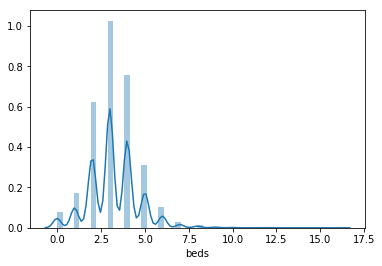

In [151]:
sns.distplot(df_pandas_bed)

In [16]:
df_pandas=df_ca_sub_f.toPandas()
df_pandas_year=df_pandas['year_built']

year_mean= df_pandas_year.agg({'year_built': 'mode'})

NameError: name 'df_pandas_bed' is not defined

In [26]:
year_mean= df_pandas_year.agg({'year_built': 'mode'})

In [27]:
year_mean

year_built  0    2018.0
dtype: float64

In [19]:
import seaborn as sns
sns.distplot(df_pandas_year)

ValueError: cannot convert float NaN to integer

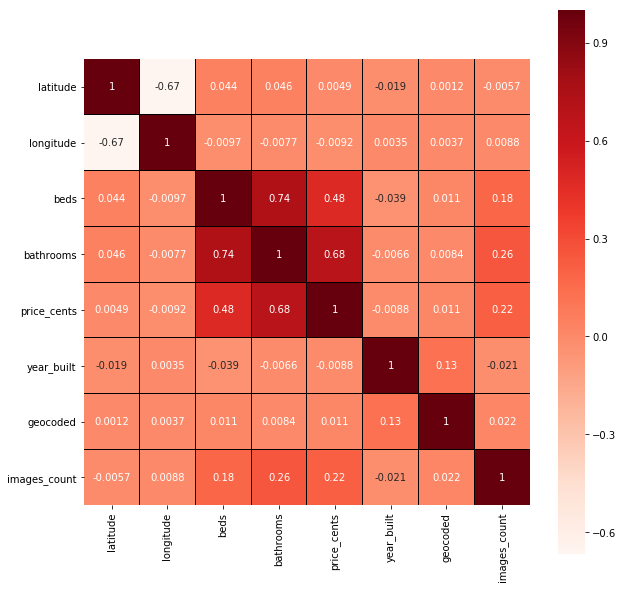

In [71]:
# Find out correlation among features


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#plt.figure()

sns.heatmap(pdd.corr(), square=True, annot=True, cmap='Reds',linecolor="black", linewidths=0.10)
plt.show()




In [471]:
#####################################################################################
# feature Engineer Beds and Baths
# 
#####################################################################################
printDf(df_ca_sub_f.select("beds","bathrooms").distinct())



In [ ]:
#####################################################################################
# feature Engineer price_cents (all good nothing to be done)
# 
#####################################################################################
printDf(df_ca_sub_f.select("price_cents").distinct())



In [475]:
#####################################################################################
# feature Engineer listing_type (remove it)
# 
#####################################################################################
#printDf(df_ca_sub_f.select("listing_type").distinct())

sqlContext.sql("select listing_type, count(1) from ca_sub_table group by 1").show()

#printDf(df_ca_sub_f.select("listing_type","property_type","property_sub_type","listing_status").distinct())


+------------+--------+
|listing_type|count(1)|
+------------+--------+
|        null|      31|
|    by agent|    3360|
+------------+--------+



In [478]:
#####################################################################################
# feature Engineer property_type and property_sub_type (Need more understanding of these fields)
#
#####################################################################################
#printDf(df_ca_sub_f.select("property_type").distinct())

sqlContext.sql("select property_type, property_sub_type, count(1) from ca_sub_table group by 1,2 order by 3 desc").show()

#printDf(df_ca_sub_f.select("listing_type","property_type","property_sub_type","listing_status").distinct())


+-------------+--------------------+--------+
|property_type|   property_sub_type|count(1)|
+-------------+--------------------+--------+
|         null|                null|    2823|
|Single Family|               House|     240|
|Single Family|           Apartment|     239|
|Single Family|     Row / Townhouse|      46|
|  Residential|Single Family Det...|      14|
|  Residential|           Apartment|       6|
|  Residential|           Townhouse|       5|
|Single Family|               Other|       4|
|Single Family|              Duplex|       3|
|Single Family|                null|       2|
|  Residential|Single Family Att...|       2|
|Single Family|             Triplex|       2|
|      Parking|             Parking|       2|
|       Retail|Residential Comme...|       1|
|Single Family|            Fourplex|       1|
|  MultiFamily|              Duplex|       1|
+-------------+--------------------+--------+



In [482]:
#####################################################################################
# feature Engineer listing_status (remove it)
#
#####################################################################################
sqlContext.sql("select listing_status, count(1) from ca_sub_table group by 1").show()


+--------------+--------+
|listing_status|count(1)|
+--------------+--------+
|      [active]|    3391|
+--------------+--------+



In [484]:
#####################################################################################
# feature Engineer year_built (need to decide what to populate for NULLs)
#
#####################################################################################
sqlContext.sql("select year_built, count(1) from ca_sub_table group by 1").show()



+----------+--------+
|year_built|count(1)|
+----------+--------+
|      2018|    2226|
|      2013|       2|
|      null|     569|
|      2019|     590|
|      2009|       1|
|      2017|       3|
+----------+--------+



'\nyear_built,               \nutilities,                \nparking_types,            \nhas_pool,                  \nhas_fireplace,             \nhas_garage,                \nimages,                   \nagent_fname,               \nagent_lname,               \nexternal_type,             \nagent_key,                 \nbrokerage_external_id,     \nbrokerage_name,            \nexternal_id,              \ngeocoded                  \n'

In [487]:
#####################################################################################
# feature Engineer has?? fields (need to decide what to populate for NULLs)
#
#####################################################################################
sqlContext.sql("select has_pool, has_fireplace, has_garage, count(1) from ca_sub_table group by 1,2,3").show()


+--------+-------------+----------+--------+
|has_pool|has_fireplace|has_garage|count(1)|
+--------+-------------+----------+--------+
|   false|         true|      true|     155|
|    true|         null|     false|    1394|
|   false|        false|     false|      54|
|    null|         null|      null|    1457|
|    true|        false|      true|     104|
|    true|         true|      true|      22|
|    true|        false|     false|       5|
|   false|         true|     false|      12|
|   false|        false|      true|     188|
+--------+-------------+----------+--------+



In [491]:
#####################################################################################
# feature Engineer agents fields (remove it)
#
#####################################################################################
sqlContext.sql("select agent_fname, agent_lname, agent_key, count(1) from ca_sub_table group by 1,2,3 order by 4 desc").show()



+-----------+------------------+-------------+--------+
|agent_fname|       agent_lname|    agent_key|count(1)|
+-----------+------------------+-------------+--------+
|       null|              null|         null|    2823|
|    RANDALL|             WEESE|      1567339|      10|
|      SARAH|       JANE TEMPLE|      1469519|       7|
|      BELLA|               LEE|      1421192|       6|
|   ALLISTER|     JOHN SINCLAIR|      1414641|       5|
|        ELI|         BAKHTIARI|      1413342|       4|
|   MUSSARAT|              MIAN|      1968046|       4|
|      SUNNY|           PATHEJA|      1668886|       4|
|     ROBERT|             KROLL|      1416074|       4|
|   GURPREET|             SINGH|      1930599|       4|
|     JANICE|               FOX|      1420347|       4|
|        THI|            NGUYEN|      2058004|       3|
|    STEPHEN|            KRUGER|      1410737|       3|
|   MICHELLE|              DONG|      1996410|       3|
|      ELISE|         S. KALLES|      1410506|  

In [494]:
#####################################################################################
# feature Engineer external type fields (use key value logic)
#
#####################################################################################
printDf(sqlContext.sql("select external_type, count(1) from ca_sub_table group by 1 order by 2 desc"))



In [498]:
#####################################################################################
# feature Engineer external type fields (use key value logic) brokers can be removed. too challenging to feature 
# engineer
#
#####################################################################################
printDf(sqlContext.sql("select brokerage_name, count(1) from ca_sub_table group by 1 order by 2 desc"))



In [499]:
#####################################################################################
# feature Engineer external type fields (use key value logic) brokers can be removed. too challenging to feature 
# engineer
#
#####################################################################################
printDf(sqlContext.sql("select external_id, count(1) from ca_sub_table group by 1 order by 2 desc"))


In [500]:
#####################################################################################
# feature Engineer external type fields (use key value logic) brokers can be removed. too challenging to feature 
# engineer
#
#####################################################################################
printDf(sqlContext.sql("select geocoded, count(1) from ca_sub_table group by 1 order by 2 desc"))


In [ ]:
##################################################
## TETS ONE-HOT-ENCODING on postal
##################################################

In [528]:
test=df_ca_sub_f.select("address_street")


In [529]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
stringIndexer = StringIndexer(inputCol="address_street", outputCol="Index")
model = stringIndexer.fit(test)
indexed = model.transform(test)
    
indexed.show()


+------------------+------+
|    address_street| Index|
+------------------+------+
|        Spadina Rd| 157.0|
|            Eva Rd| 272.0|
|       Warden Ave | 116.0|
|         King St W|   5.0|
|      Concorde Pl |  79.0|
|    Coldstream Ave|1140.0|
|   Annie Craig Dr |  12.0|
|  Forest Manor Rd |   8.0|
|   Dan Leckie Way | 143.0|
|      Beverley St |  78.0|
|    Greenview Ave |  96.0|
|Victoria Park Ave | 118.0|
|Victoria Park Ave | 118.0|
|       August Ave | 127.0|
|      Garland Ave |1134.0|
|     Havendale Rd |1762.0|
|    Pinegrove Ave | 499.0|
|       Stafford Rd|1340.0|
|  Merchants' Wharf|1643.0|
|Merchants' Wharf  | 130.0|
+------------------+------+
only showing top 20 rows



In [531]:
encoder = OneHotEncoder(dropLast=False, inputCol="Index", outputCol="address_streetVec")
encoded = encoder.transform(indexed)
encoded.select("Index","address_streetVec").show()

+------+-------------------+
| Index|  address_streetVec|
+------+-------------------+
| 157.0| (1880,[157],[1.0])|
| 272.0| (1880,[272],[1.0])|
| 116.0| (1880,[116],[1.0])|
|   5.0|   (1880,[5],[1.0])|
|  79.0|  (1880,[79],[1.0])|
|1140.0|(1880,[1140],[1.0])|
|  12.0|  (1880,[12],[1.0])|
|   8.0|   (1880,[8],[1.0])|
| 143.0| (1880,[143],[1.0])|
|  78.0|  (1880,[78],[1.0])|
|  96.0|  (1880,[96],[1.0])|
| 118.0| (1880,[118],[1.0])|
| 118.0| (1880,[118],[1.0])|
| 127.0| (1880,[127],[1.0])|
|1134.0|(1880,[1134],[1.0])|
|1762.0|(1880,[1762],[1.0])|
| 499.0| (1880,[499],[1.0])|
|1340.0|(1880,[1340],[1.0])|
|1643.0|(1880,[1643],[1.0])|
| 130.0| (1880,[130],[1.0])|
+------+-------------------+
only showing top 20 rows



In [ ]:
#####################################################################################
#####################################################################################
# Step 1 (Handle missing data/null values)
# Step 2 (Transofrmation) --> String lables to Numberic/Indices lables ( i.e. StringIndexer)
# Step 3 (Vectorization)  --> Numeric/Indices to Binary Vectors ( i.e. One-hot-encoding and VectorIndexer) (categorical)
# Step 4 (Standardization)--> Bring all vectors to same unit/scale (i.e. Normalizer, StandardScaler, MinMx Scaler etc )
#####################################################################################
#####################################################################################


In [393]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()

a = labelencoder_X.fit_transform(df_ca_sub_f.select("parking_types_array"))

#onehotencoder = OneHotEncoder(categorical_features = [0])

#X = onehotencoder.fit_transform(X).toarray()



ValueError: bad input shape ()

In [372]:
# This is for kel-value types
tmp_property_type = df_ca_sub_f.select("_id","parking_types").withColumn("parking_types_array",F.explode("parking_types")) \
                    .withColumn('key', F.split("parking_types_array",":").getItem(0)).withColumn('value', F.split("parking_types_array",":").getItem(1)) \
                    .select("_id","key","value").groupBy("_id").pivot("key").agg(F.first("value"))


In [373]:
tmp_property_type.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- Attached garage: string (nullable = true)
 |-- Carport: string (nullable = true)
 |-- Detached garage: string (nullable = true)
 |-- Garage: string (nullable = true)
 |-- Underground: string (nullable = true)
 |-- Visitor parking: string (nullable = true)



In [374]:
df_ca_sub_f = df_ca_sub_f.join(tmp_property_type, '_id', 'left') \
              .drop("parking_types")

In [375]:
df_ca_sub_f.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- mls_number: string (nullable = true)
 |-- location_ids: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- oid: string (nullable = true)
 |-- lower_location_id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- location: struct (nullable = true)
 |    |-- type: string (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |-- address_number: string (nullable = true)
 |-- address_street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- postal: string (nullable = true)
 |-- province: string (nullable = true)
 |-- country: string (nullable = true)
 |-- beds: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- price_cents: integer (nullable = true)
 |-- listing_type: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- listing_sta

In [377]:
df_ca_sub_f.select("_id","Attached garage","Carport","Garage","Underground","Visitor parking").show()

+--------------------+---------------+-------+------+-----------+---------------+
|                 _id|Attached garage|Carport|Garage|Underground|Visitor parking|
+--------------------+---------------+-------+------+-----------+---------------+
|[5c752481c5c1f100...|           null|   null|  null|       null|           null|
|[5c788c51c5c1f100...|           null|   null|  null|       null|           null|
|[5c78a7ef92596f00...|           null|   null|  null|       null|           null|
|[5c790a2f92596f00...|           null|   null|  null|       null|           null|
|[5c996b42b5d50800...|           null|   null|  null|       null|           null|
|[5c9ffea7be7c7e00...|           null|   null|  null|       null|           null|
|[5caaf957650b1600...|           null|   null|  null|       null|           null|
|[5cab3166650b1600...|           null|   null|  null|       null|           null|
|[5cabad52650b1600...|           null|   null|  null|       null|           null|
|[5cba887e650b16

In [158]:
#df_ca.select("utilities").distinct().count()

25018

In [224]:
sqlContext.sql("select property_sub_type, count(*) from ca_sub_table group by 1 order by count(*) desc ").show()

+-------------------+--------+
|      parking_types|count(1)|
+-------------------+--------+
|               null|    3967|
|    ["Underground"]|     644|
|["Attached garage"]|     212|
|         ["Garage"]|     197|
|["Detached garage"]|     108|
|["Visitor parking"]|      16|
|        ["Carport"]|      12|
|   ["Inside Entry"]|       1|
+-------------------+--------+



In [234]:
sqlContext.sql("select utilities, count(*) from ca_table group by 1 order by count(*) desc ").show()

+--------------------+--------+
|           utilities|count(1)|
+--------------------+--------+
|                null|   22909|
|             ["All"]|    3885|
|["Washer", "Dryer...|    2713|
|["Refrigerator", ...|     993|
|["Dishwasher", "R...|     835|
|  ["Central Vacuum"]|     627|
|            ["None"]|     495|
|      ["Dishwasher"]|     474|
|["Washer", "Refri...|     414|
|["All", "Central ...|     391|
|     ["See remarks"]|     387|
|["Dryer - Electri...|     347|
|["Dryer - Electri...|     338|
|["Garage door ope...|     320|
|["Dishwasher", "D...|     281|
|["Dryer", "Dishwa...|     261|
|["Washer", "Refri...|     252|
|["Garage door ope...|     236|
|["Refrigerator", ...|     225|
|["Washer", "Dishw...|     206|
+--------------------+--------+
only showing top 20 rows



In [218]:
sqlContext.sql("select city, count(*) from ca_table where 1=1 group by city order by 2 desc " ).show()
    
               

+-------------+--------+
|         city|count(1)|
+-------------+--------+
|      Toronto|    5157|
|     Edmonton|    3070|
|    Vancouver|    2042|
|       Surrey|    1707|
|     Brampton|    1316|
|  Mississauga|    1277|
|      Vaughan|    1174|
|      Markham|    1114|
|Richmond Hill|    1074|
|     Richmond|    1059|
|    Saskatoon|    1032|
|     Oakville|     989|
|     Hamilton|     977|
|       Regina|     845|
|      Burnaby|     830|
|      Kelowna|     794|
|       Barrie|     724|
|     Victoria|     671|
|       Ottawa|     611|
|       Oshawa|     580|
+-------------+--------+
only showing top 20 rows



In [190]:
#sqlContext.sql("select INSTR(utilities,'Washer') as 'washer',  select INSTR(utilities,'Dryer') 'Dryer' from ca_table").show()
aa=sqlContext.sql("select INSTR(upper(utilities),'WASHER') as washer, INSTR(upper(utilities),'DRYER') as dryer, * from ca_table")




+------+-----+--------------------+-------------+----------+--------------------+--------------------+-----------+-----------+-----------------+------------+--------------------+------+---------+--------------------+---------+--------------------+----+---------------------+--------------------+--------------+-----------------+-------+-----------+--------+--------+-------------+----------+--------------------+----------------+--------------------+-----------------+----------+-----------+-------------+-----------+--------------------+--------------------+
|washer|dryer|           utilities|parking_types|year_built|        location_ids|   lower_location_id|agent_fname|agent_lname|property_sub_type|listing_type|            location|postal|bathrooms|       external_type|agent_key|      address_street|beds|brokerage_external_id|      brokerage_name|address_number|             city|country|external_id|has_pool|geocoded|has_fireplace|has_garage|              images|        latitude|      listi

In [ ]:
#####################################################################################
#####################################################################################
## EXTRA
#####################################################################################
#####################################################################################


In [117]:
#####################################################################################
## Print each column with number of NULL values
#####################################################################################
import pyspark.sql.functions as F

df_agg = df.agg(*[F.count(F.when(F.isnull(c), c)).alias(c) for c in new_df.columns])

In [ ]:
#####################################################################################
##Write JSON 
#####################################################################################
df.coalesce(1).write.format('json').save('/your_path/output_directory')

In [ ]:
#####################################################################################
##Following are the Schema type mismatches when Spark loads property data
#####################################################################################

'total_sqft' - Cannot cast STRING into a DoubleType (value: BsonString{value='1398'})
'building_sqft' - Cannot cast STRING into a DoubleType (value: BsonString{value=''})
'lot_sqft' - Cannot cast STRING into a DoubleType (value: BsonString{value='NA'})
'external_url'- Cannot cast STRING into a DoubleType (value: BsonString{value='1398'})
'furnished' - Cannot cast BOOLEAN into a NullType (value: BsonBoolean{value=false})
'main_level_sqft'  - Cannot cast STRING into a DoubleType (value: BsonString{value='1398'})
'open_house_count' - Cannot cast STRING into a NullType (value: BsonString{value=''})    
'state' - Cannot cast STRING into a NullType (value: BsonString{value='active'})
'stories' - Cannot cast STRING into a IntegerType (value: BsonString{value=''})
'total_sqft'- Cannot cast STRING into a DoubleType (value: BsonString{value='1398'})
'available_showing' -  Cannot cast BOOLEAN into a NullType 


In [43]:
from __future__ import print_function

# $example on$
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
# $example off$
from pyspark.sql import SparkSession

In [62]:
df1 = my_spark.createDataFrame(df_ca_sub_f, ["features"])

TypeError: data is already a DataFrame

In [58]:
df.columns

['features']

In [53]:

r1 = Correlation.corr(df,df.columns).head()
print("Pearson correlation matrix:\n" + str(r1[0]))

r2 = Correlation.corr(df, df.columns).head()
print("Spearman correlation matrix:\n" + str(r2[0]))
    # $example off$

Py4JError: An error occurred while calling z:org.apache.spark.ml.stat.Correlation.corr. Trace:
py4j.Py4JException: Method corr([class org.apache.spark.sql.Dataset, class java.util.ArrayList, class java.lang.String]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:339)
	at py4j.Gateway.invoke(Gateway.java:276)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)



In [ ]:
####################################
# DATA CAMP Like conditions

df=df.where(~df['column_name'].like('%check%'))


from pyspark.sql.functions import when

find_under_8=df['roof'].like('%8 years of less%')
find_over_8 =df['roof'].like('%Over 8 years %')

df=df.withColumn('old_rood', (when(find_under_8,1).when(find_over_8,0).otherwise(None)
                ))

# Split the columns

split_col=split(df['ROOF'],',')
df=df.withColumn('roof_material',split_col.getItem(0))


In [ ]:
5

It's not about not being able to compute something.

Distances much be used to measure something meaningful. This will fail much earlier with categorial data. If it ever works with more than one variable, that is...

If you have the attributes shoe size and body mass, Euclidean distance doesn't make much sense either. It's good when x,y,z are distances. Then Euclidean distance is the line of sight distance between the points.

Now if you dummy-encode variables, what meaning does this yield?

Plus, Euclidean distance doesn't make sense when your data is discrete.

If there only exist integer x and y values, Euclidean distance will still yield non-integer distances. They don't map back to the data. Similarly, for dummy-encoded variables, the distance will not map back to a quantity of dummy variables...

When you then plan to use e.g. k-means clustering, it isn't just about distances, but about computing the mean. But there is no reasonable mean on dummy-encoded variables, is there?

Finally, there is the curse of dimensionality. Euclidean distance is known to degrade when you increase the number of 
variables. Adding dummy-encoded variables means you lose distance contrast quite fast.
Everything is as similar as everything else, because a single dummy variable can make all the difference.



In [16]:
from pyspark.ml.feature import MinHashLSH
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col

dataA = [(0, Vectors.sparse(6, [1, 3, 4], [1.0, 1.0, 1.0]),),
         (1, Vectors.sparse(6, [2, 3, 4], [1.0, 1.0, 1.0]),),
         (2, Vectors.sparse(6, [0, 2, 4], [1.0, 1.0, 1.0]),)]

dfA = my_spark.createDataFrame(dataA, ["id", "features"])

dataB = [(3, Vectors.sparse(6, [1, 3, 4], [1.0, 1.0, 1.0]),),
         (4, Vectors.sparse(6, [2, 3, 5], [1.0, 1.0, 1.0]),),
         (5, Vectors.sparse(6, [1, 2, 4], [1.0, 1.0, 1.0]),)]
dfB = my_spark.createDataFrame(dataB, ["id", "features"])

#key = Vectors.sparse(6, [1, 3], [1.0, 1.0])

mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=5)
model = mh.fit(dfA)

# Feature Transformation
#print("The hashed dataset where hashed values are stored in the column 'hashes':")
model.transform(dfA).show(1000, False)

# Compute the locality sensitive hashes for the input rows, then perform approximate
# similarity join.
# We could avoid computing hashes by passing in the already-transformed dataset, e.g.
# `model.approxSimilarityJoin(transformedA, transformedB, 0.6)`
print("Approximately joining dfA and dfB on distance smaller than 0.6:")
model.approxSimilarityJoin(dfA, dfB, 10, distCol="JaccardDistance")\
    .select(col("datasetA.id").alias("idA"),
            col("datasetB.id").alias("idB"),
            col("JaccardDistance")).show(1000, False)

# Compute the locality sensitive hashes for the input rows, then perform approximate nearest
# neighbor search.
# We could avoid computing hashes by passing in the already-transformed dataset, e.g.
# `model.approxNearestNeighbors(transformedA, key, 2)`
# It may return less than 2 rows when not enough approximate near-neighbor candidates are
# found.
#print("Approximately searching dfA for 2 nearest neighbors of the key:")
#model.approxNearestNeighbors(dfA, key, 2).show()

+---+-------------------------+---------------------------------------------------------------------------------+
|id |features                 |hashes                                                                           |
+---+-------------------------+---------------------------------------------------------------------------------+
|0  |(6,[1,3,4],[1.0,1.0,1.0])|[[3.43004824E8], [4.93065685E8], [5.36633028E8], [3.5222799E8], [1.843906368E9]] |
|1  |(6,[2,3,4],[1.0,1.0,1.0])|[[3.43004824E8], [4.93065685E8], [5.40258524E8], [3.5222799E8], [1.87309555E9]]  |
|2  |(6,[0,2,4],[1.0,1.0,1.0])|[[3.43004824E8], [2.34727554E8], [5.40258524E8], [1.07316488E8], [1.814717186E9]]|
+---+-------------------------+---------------------------------------------------------------------------------+

Approximately joining dfA and dfB on distance smaller than 0.6:
+---+---+---------------+
|idA|idB|JaccardDistance|
+---+---+---------------+
|2  |5  |0.5            |
|1  |4  |0.5            |
|0  |3 

In [18]:
dfB.printSchema()

root
 |-- id: long (nullable = true)
 |-- features: vector (nullable = true)

